In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 1. Data Collection and preparation

## About the data: Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [2]:
data = pd.read_csv("kc_house_data.csv")
data.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0         NaN   0.0     ...          7        1180   
1      7242     2.0         0.0   0.0     ...          7        2170   
2     10000     1.0         0.0   0.0     ...          6         770   
3      5000     1.0         0.0   0.0     ...          7        1050   
4      8080     1.0         0.0   0.0     ...          8        1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [3]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


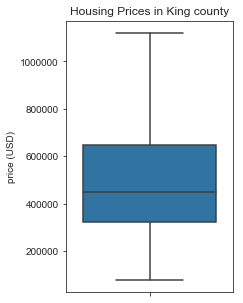

In [5]:
import seaborn as sns
sns.set_style('ticks')
fig, ax = plt.subplots(figsize =(3,5))

box=sns.boxplot( y=data.price, showfliers =False, ax=ax)
box.set(ylabel='price (USD)', title ='Housing Prices in King county')
# plt.xlabel= 'price(USD)'

fig.savefig('box_price.png', dpi=400, bbox_inches="tight")

In [6]:
data.price.describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Before cleaning the data, 5 variables (`id`, `data`, `view`, `lat`, and `long`) that are oviously irrelevant for the house price. All removed columns from the data are saved separately just in case. 

In [7]:
# id - unique identified for a house
# date - house was sold
#view - Has been viewed
#long, lat - information about the location of house
ID = data.id
DATE = data.date
VIEW= data.view
LAT= data.lat
LONG =data.long
data.drop(['id','date','view','lat','long'], axis =1, inplace=True )


## Data cleaning and dealing with missing values

### 1. Dealing variables that has obvious missing values detected from the summary of data information


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(5), int64(10), object(1)
memory usage: 2.6+ MB


In [9]:
data.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
sqft_living15       0
sqft_lot15          0
dtype: int64

First, `waterfront` is a categrocial variable with 2376 missing values. 

In [10]:
data.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

So we will treat missing values as one category with the other two values:
* yes :1
* no : 0
* na : 2

when we change this categorical value column to three dummy variable columns. 

In [11]:
f = lambda x: 1 if x>0 else 0 if x ==0 else 2
data.waterfront = data.waterfront.apply(f).astype('category')

waterfront_dummies = pd.get_dummies(data.waterfront, prefix = 'water')
data.drop('waterfront', axis = 1, inplace = True)
data = pd.concat([data, waterfront_dummies], axis =1)
data.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0  221900.0         3       1.00         1180      5650     1.0          3   
1  538000.0         3       2.25         2570      7242     2.0          3   
2  180000.0         2       1.00          770     10000     1.0          3   
3  604000.0         4       3.00         1960      5000     1.0          5   
4  510000.0         3       2.00         1680      8080     1.0          3   

   grade  sqft_above sqft_basement  yr_built  yr_renovated  zipcode  \
0      7        1180           0.0      1955           0.0    98178   
1      7        2170         400.0      1951        1991.0    98125   
2      6         770           0.0      1933           NaN    98028   
3      7        1050         910.0      1965           0.0    98136   
4      8        1680           0.0      1987           0.0    98074   

   sqft_living15  sqft_lot15  water_0  water_1  water_2  
0           1340        5650        0        0        1  
1           1690        7639        1        0        0  
2           2720        8062        1        0        0  
3           1360        5000        1        0        0  
4           1800        7503        1        0        0

Next, we work on `yr_renovated`. Let us look at what kinds of values are in the observations and frequencies of each value recorded.

In [12]:
data.yr_renovated.value_counts(normalize = True).head(20)
#normalize = True will show the proportion of the each value. 

0.0       0.958096
2014.0    0.004112
2003.0    0.001746
2013.0    0.001746
2007.0    0.001690
2000.0    0.001633
2005.0    0.001633
1990.0    0.001239
2004.0    0.001239
2009.0    0.001183
1989.0    0.001126
2006.0    0.001126
2002.0    0.000957
1991.0    0.000901
1998.0    0.000901
1984.0    0.000901
1999.0    0.000845
2008.0    0.000845
2010.0    0.000845
2001.0    0.000845
Name: yr_renovated, dtype: float64

95.8% of `yr_renovated` is `0` which I would be consider it as **never been renovated** since there is no information about this. If we were to use this variable as it is, the values which are not 0 is very small and their impact is negligible when we consider the portion of the individual values. For example, the second most frequent year value in this column is year 2014 and its frequency is less than 0.05 % out of 100% as the total number of observation. Therefore, this variable will be turned into a categorical vriable as:
* 0 : never been renovated
* 1 : renovated
* 2 : na

In [13]:
f = lambda x: 1 if x>0 else 0 if x ==0 else 2
data.yr_renovated = data.yr_renovated.apply(f).astype('category')
data.yr_renovated.value_counts()

0    17011
2     3842
1      744
Name: yr_renovated, dtype: int64

Now we will turn this categorical variable to three dummy variables.

In [14]:
yr_renovated_dummies = pd.get_dummies(data.yr_renovated, prefix = 'renov')
yr_renovated_dummies.head()

renov_0  renov_1  renov_2
0        1        0        0
1        0        1        0
2        0        0        1
3        1        0        0
4        1        0        0

In [15]:
data.drop('yr_renovated',axis =1, inplace=True)
data = pd.concat([data, yr_renovated_dummies],axis =1)
data.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0  221900.0         3       1.00         1180      5650     1.0          3   
1  538000.0         3       2.25         2570      7242     2.0          3   
2  180000.0         2       1.00          770     10000     1.0          3   
3  604000.0         4       3.00         1960      5000     1.0          5   
4  510000.0         3       2.00         1680      8080     1.0          3   

   grade  sqft_above sqft_basement  yr_built  zipcode  sqft_living15  \
0      7        1180           0.0      1955    98178           1340   
1      7        2170         400.0      1951    98125           1690   
2      6         770           0.0      1933    98028           2720   
3      7        1050         910.0      1965    98136           1360   
4      8        1680           0.0      1987    98074           1800   

   sqft_lot15  water_0  water_1  water_2  renov_0  renov_1  renov_2  
0        5650        0        0        1        1        0        0  
1        7639        1        0        0        0        1        0  
2        8062        1        0        0        0        0        1  
3        5000        1        0        0        1        0        0  
4        7503        1        0        0        1        0        0

To avoid the multicollinearity from dummy variables, we drop one column from each category. 

In [16]:
data.drop(['water_2', 'renov_2'],axis =1, inplace =True)

In [17]:
data.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0  221900.0         3       1.00         1180      5650     1.0          3   
1  538000.0         3       2.25         2570      7242     2.0          3   
2  180000.0         2       1.00          770     10000     1.0          3   
3  604000.0         4       3.00         1960      5000     1.0          5   
4  510000.0         3       2.00         1680      8080     1.0          3   

   grade  sqft_above sqft_basement  yr_built  zipcode  sqft_living15  \
0      7        1180           0.0      1955    98178           1340   
1      7        2170         400.0      1951    98125           1690   
2      6         770           0.0      1933    98028           2720   
3      7        1050         910.0      1965    98136           1360   
4      8        1680           0.0      1987    98074           1800   

   sqft_lot15  water_0  water_1  renov_0  renov_1  
0        5650        0        0        1        0  
1        7639        1        0        0        1  
2        8062        1        0        0        0  
3        5000        1        0        1        0  
4        7503        1        0        1        0

### 2. Dealing with not so obvious missing values

The data type of `sqft_basement` is string and often we see that a column with string as its data type has different way to indicate missing values. 

In [18]:
data.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
450.0       103
530.0       103
480.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
780.0        76
550.0        76
650.0        75
240.0        74
380.0        73
680.0        73
850.0        72
          ...  
2500.0        1
2360.0        1
2350.0        1
666.0         1
417.0         1
2120.0        1
65.0          1
2250.0        1
1798.0        1
274.0         1
2390.0        1
516.0         1
1284.0        1
2490.0        1
2050.0        1
20.0          1
1960.0        1
1852.0        1
2580.0        1
1525.0        1
1275.0        1
602.0         1
143.0         1
2850.0        1
2400.0        1
207.0         1
1880.0        1
3480.0        1
2810.0        1
1913.0        1
Name: sqft_basement, Len

In `sqft_basement`, `'?'` seems to reprenst missing values. `'?'` will be replaced with numercal place holer, arbitrally picked `'7'` that is not in observations then change its data type to float. Then the data type of values in the column will be changed to `float` and `7` will be, again, replace with `NaN`.

In [19]:
#checking 7 is not used in this column 
'7' in data.sqft_basement.value_counts().index

False

In [20]:
data.sqft_basement = data.sqft_basement.replace('?','7')
data.sqft_basement = data.sqft_basement.astype('float')
data.sqft_basement = data.sqft_basement.astype('int')
data.sqft_basement =data.sqft_basement.replace(7, np.NaN)

data.sqft_basement.dtype

dtype('float64')

In [21]:
data.sqft_basement.describe()

count    21143.000000
mean       291.851724
std        442.498337
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

In [22]:
data.sqft_basement.value_counts(normalize = True).head(10)

0.0       0.606631
600.0     0.010263
500.0     0.009885
700.0     0.009838
800.0     0.009507
400.0     0.008703
1000.0    0.007000
900.0     0.006716
300.0     0.006716
200.0     0.004966
Name: sqft_basement, dtype: float64

As about 60% of observation in `sqft_basement` is 0 which is also the median, the missing value will be replaced with 0.

In [23]:
data.sqft_basement=data.sqft_basement.fillna(data.sqft_basement.median())

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
zipcode          21597 non-null int64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
water_0          21597 non-null uint8
water_1          21597 non-null uint8
renov_0          21597 non-null uint8
renov_1          21597 non-null uint8
dtypes: float64(4), int64(10), uint8(4)
memory usage: 2.4 MB


In [25]:
for col in data.columns:
    val = len(data[col].unique())
    print('{} has {} unique values.'.format(col, val))

price has 3622 unique values.
bedrooms has 12 unique values.
bathrooms has 29 unique values.
sqft_living has 1034 unique values.
sqft_lot has 9776 unique values.
floors has 6 unique values.
condition has 5 unique values.
grade has 11 unique values.
sqft_above has 942 unique values.
sqft_basement has 303 unique values.
yr_built has 116 unique values.
zipcode has 70 unique values.
sqft_living15 has 777 unique values.
sqft_lot15 has 8682 unique values.
water_0 has 2 unique values.
water_1 has 2 unique values.
renov_0 has 2 unique values.
renov_1 has 2 unique values.


## To avoiding multicollinearity, we remove predictors that are strongly correlated with other predictors. 

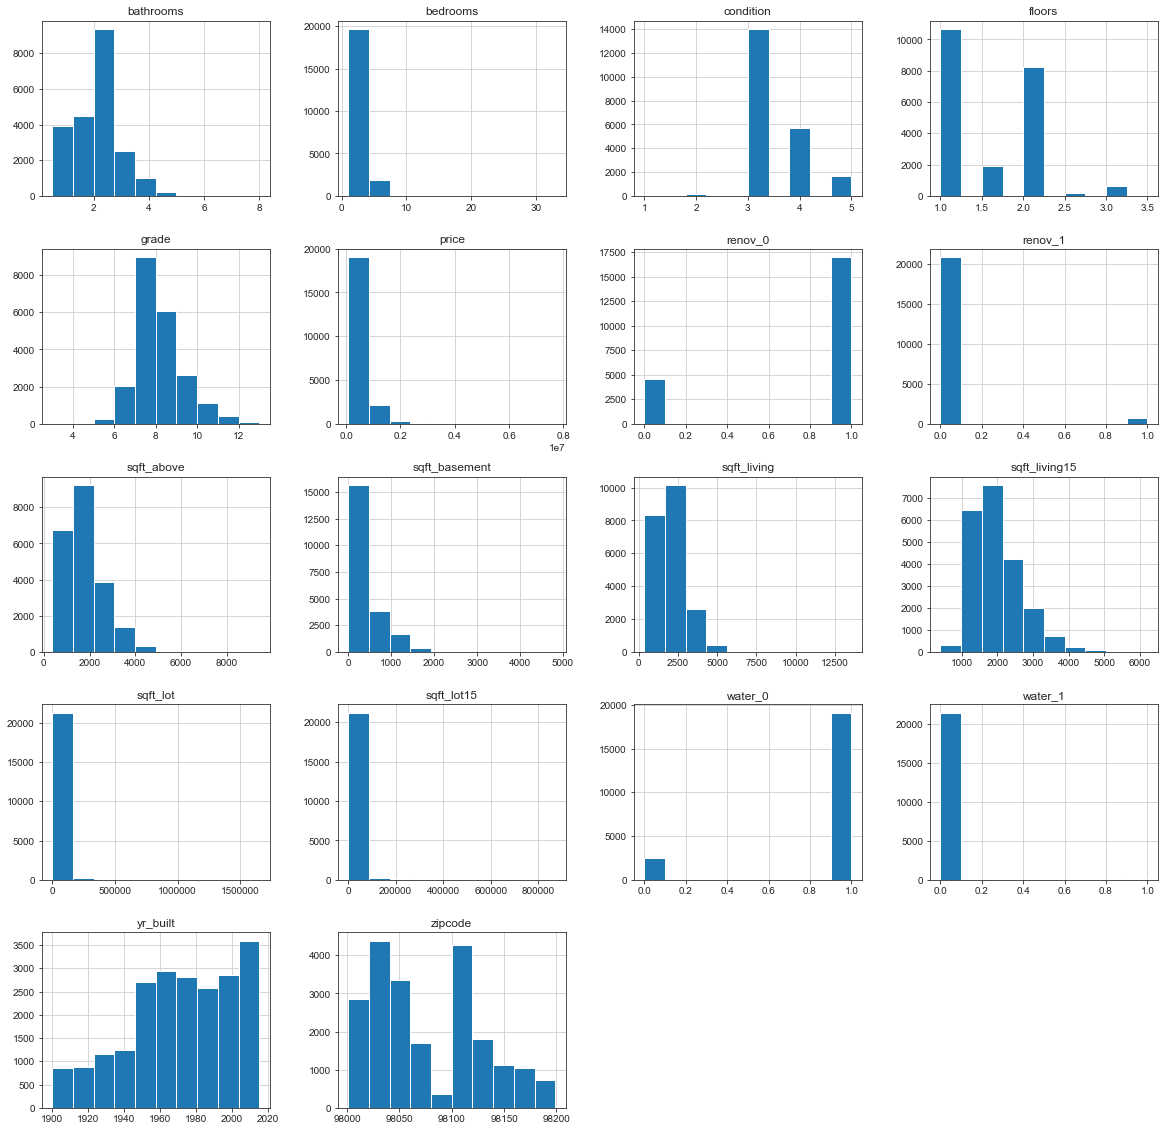

In [26]:
data.hist(figsize=(20,20));

In [27]:
abs(data.corr())>0.75

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
price           True     False      False        False     False   False   
bedrooms       False      True      False        False     False   False   
bathrooms      False     False       True         True     False   False   
sqft_living    False     False       True         True     False   False   
sqft_lot       False     False      False        False      True   False   
floors         False     False      False        False     False    True   
condition      False     False      False        False     False   False   
grade          False     False      False         True     False   False   
sqft_above     False     False      False         True     False   False   
sqft_basement  False     False      False        False     False   False   
yr_built       False     False      False        False     False   False   
zipcode        False     False      False        False     False   False   
sqft_living15  False     False      False         True     False   False   
sqft_lot15     False     False      False        False     False   False   
water_0        False     False      False        False     False   False   
water_1        False     False      False        False     False   False   
renov_0        False     False      False        False     False   False   
renov_1        False     False      False        False     False   False   

               condition  grade  sqft_above  sqft_basement  yr_built  zipcode  \
price              False  False       False          False     False    False   
bedrooms           False  False       False          False     False    False   
bathrooms          False  False       False          False     False    False   
sqft_living        False   True        True          False     False    False   
sqft_lot           False  False       False          False     False    False   
floors             False  False       False          False     False    False   
condition           True  False       False          False     False    False   
grade              False   True        True          False     False    False   
sqft_above         False   True        True          False     False    False   
sqft_basement      False  False       False           True     False    False   
yr_built           False  False       False          False      True    False   
zipcode            False  False       False          False     False     True   
sqft_living15      False  False       False          False     False    False   
sqft_lot15         False  False       False          False     False    False   
water_0            False  False       False          False     False    False   
water_1            False  False       False          False     False    False   
renov_0            False  False       False          False     False    False   
renov_1            False  False       False          False     False    False   

               sqft_living15  sqft_lot15  water_0  water_1  renov_0  renov_1  
price                  False       False    False    False    False    False  
bedrooms               False       False    False    False    False    False  
bathrooms              False       False    False    False    False    False  
sqft_living             True       False    False    False    False    False  
sqft_lot               False       False    False    False    False    False  
floors                 False       False    False    False    False    False  
condition              False       False    False    False    False    False  
grade                  False       False    False    False    False    False  
sqft_above             False       False    False    False    False    False  
sqft_basement          False       False    False    False    False    False  
yr_built               False       False    False    False    False    False  
zipcode                False       False    False    False    False    False  
sqf

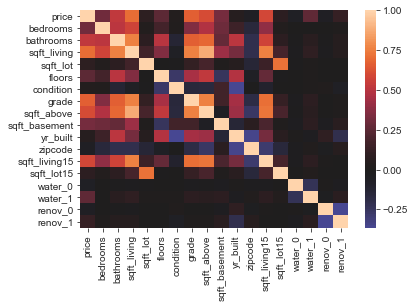

In [28]:
import seaborn as sns
sns.heatmap(data.corr(), center=0);

The function stronCorr is constructed to take a data set and the limit of correlation and return the variables and the correlations that if they are strongly correlated (greater than the limit input)

In [29]:
def strongCorr(df, limit):
    corrMat = df.corr()
    for col in corrMat.columns:
        if sum(abs(corrMat[col])>limit) > 1:
            print('the correlation is higher than {} with {}'.format(limit, col),'\n',corrMat.loc[abs(corrMat[col])>limit][col],'\n')

In [30]:
strongCorr(data, 0.75)

the correlation is higher than 0.75 with bathrooms 
 bathrooms      1.000000
sqft_living    0.755758
Name: bathrooms, dtype: float64 

the correlation is higher than 0.75 with sqft_living 
 bathrooms        0.755758
sqft_living      1.000000
grade            0.762779
sqft_above       0.876448
sqft_living15    0.756402
Name: sqft_living, dtype: float64 

the correlation is higher than 0.75 with grade 
 sqft_living    0.762779
grade          1.000000
sqft_above     0.756073
Name: grade, dtype: float64 

the correlation is higher than 0.75 with sqft_above 
 sqft_living    0.876448
grade          0.756073
sqft_above     1.000000
Name: sqft_above, dtype: float64 

the correlation is higher than 0.75 with sqft_living15 
 sqft_living      0.756402
sqft_living15    1.000000
Name: sqft_living15, dtype: float64 



`strongCorr1` takes a dataframe and a value and returns a list of predictors that have higher correlation value with other predictors than the input value. 

In [31]:
def strongCorr1(df, limit):
    corrMat = df.corr()
    correlated =[]
    for col in corrMat.columns:
        if sum(abs(corrMat[col])>limit) > 1:
            
            names = list(corrMat.loc[abs(corrMat[col])>limit].index)
            for x in names:
                if x != col:
                   # print('drop {} strongly correlated with {}.'.format(x,col))
                    correlated.append(x)
            corrCount = dict((x,correlated.count(x)) for x in set(correlated))
    return(list(set(correlated)))

In [32]:
strongCorr1(data, 0.75)

['bathrooms', 'grade', 'sqft_living', 'sqft_living15', 'sqft_above']

Based on the return of `strongCorr1`, we plot a heat map of correlation between the predictors. 

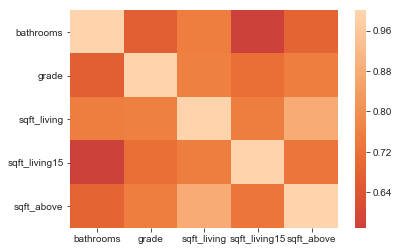

In [33]:
corr = data[strongCorr1(data,0.75)]
sns.heatmap(corr.corr(), center =0)

`sqft_living` is strongly correlated with 4 other variables from the result above, so we will check the correlations once it is eliminated. 

In [34]:
data1 = data.drop('sqft_living', axis =1)
strongCorr(data1, 0.75 )

the correlation is higher than 0.75 with grade 
 grade         1.000000
sqft_above    0.756073
Name: grade, dtype: float64 

the correlation is higher than 0.75 with sqft_above 
 grade         0.756073
sqft_above    1.000000
Name: sqft_above, dtype: float64 



This time, we will eliminate `grade` variable and check the correlation again,

In [35]:
data2 = data1.drop('grade', axis =1)
strongCorr(data2, 0.75)

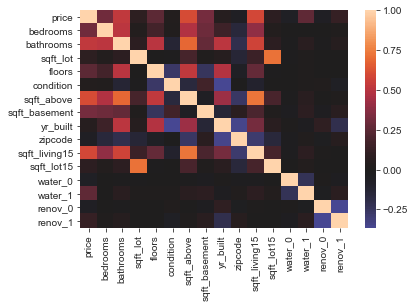

In [36]:
sns.heatmap(data2.corr(), center = 0)

In [37]:
strongCorr(data2, 0.7)

the correlation is higher than 0.7 with sqft_lot 
 sqft_lot      1.000000
sqft_lot15    0.718204
Name: sqft_lot, dtype: float64 

the correlation is higher than 0.7 with sqft_above 
 sqft_above       1.000000
sqft_living15    0.731767
Name: sqft_above, dtype: float64 

the correlation is higher than 0.7 with sqft_living15 
 sqft_above       0.731767
sqft_living15    1.000000
Name: sqft_living15, dtype: float64 

the correlation is higher than 0.7 with sqft_lot15 
 sqft_lot      0.718204
sqft_lot15    1.000000
Name: sqft_lot15, dtype: float64 



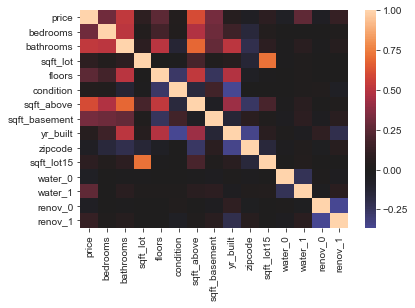

In [38]:
data2 = data2.drop('sqft_living15', axis = 1)
sns.heatmap(data2.corr(), center =0)

In [39]:
strongCorr(data2, 0.7)

the correlation is higher than 0.7 with sqft_lot 
 sqft_lot      1.000000
sqft_lot15    0.718204
Name: sqft_lot, dtype: float64 

the correlation is higher than 0.7 with sqft_lot15 
 sqft_lot      0.718204
sqft_lot15    1.000000
Name: sqft_lot15, dtype: float64 



In [40]:
data2 = data2.drop('sqft_lot15', axis = 1)
strongCorr(data2, 0.7)

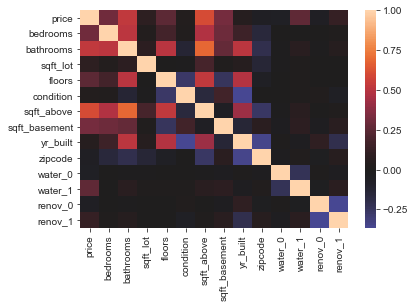

In [41]:
sns.heatmap(data2.corr(), center =0)

### From the investigation above, to avoid multicollinearity, `sqft_living15`,  `grade`, `sqft_lot15`, and  `sqft_living` variables are dropped.  

In [42]:
data = data2
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'condition',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'water_0',
       'water_1', 'renov_0', 'renov_1'],
      dtype='object')

# checking outliers initial regression


For using the least square method, outliers can pull the fitted line towards them as the sum of the squared deviation are to be minimized. 
In order to see and filter the outliers, we use box plots. We will use both scaled and original data set to find outliers and filter them.   

In [43]:
#Get an array of qunatitative variables
QuantVar = data.columns[0:-4]
QuantVar

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'condition',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode'],
      dtype='object')

In [44]:
#Apply the mean normalization on the features and save them separately as a dataframe. 
data_scaled = pd.DataFrame(columns = QuantVar)
for col in QuantVar:
    scaled = (data[col]-np.mean(data[col]))/(max(data[col])-min(data[col]))
    data_scaled[col]=scaled

Look at box plots of each variables for both scaled features and before being scaled.
We use the scaled variables to get overall ideas how the observations for each feature is distributed in range (-1,1) with mean 0. The unscaled feature values are used to see how unrealistic the outliers are in each feature. 

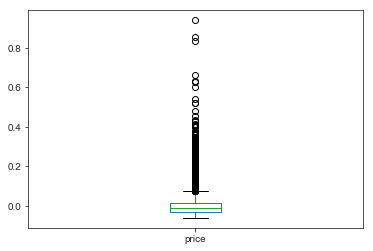

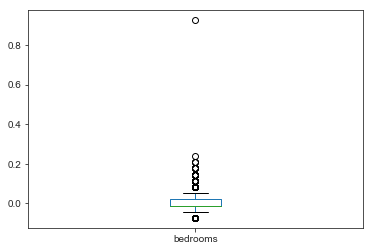

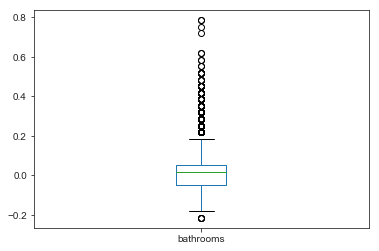

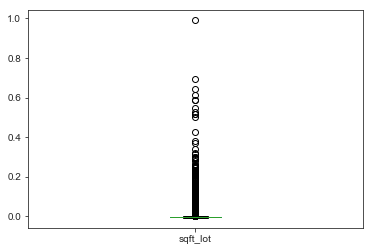

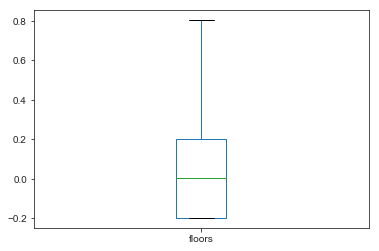

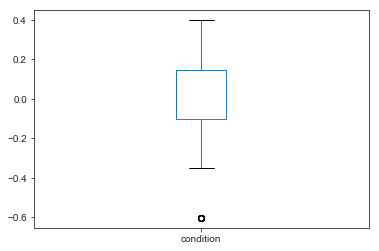

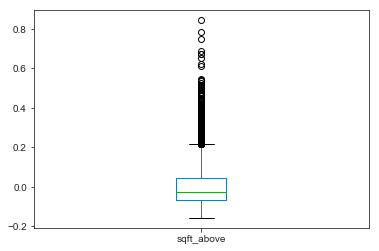

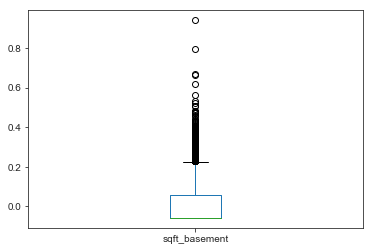

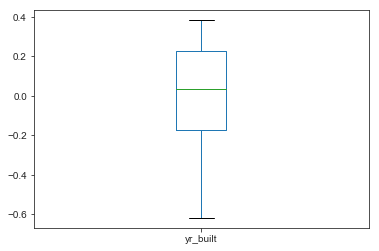

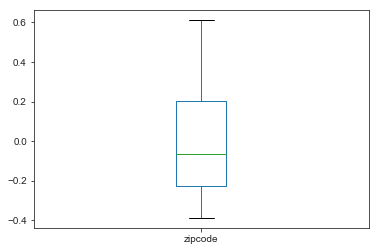

In [45]:
for col in QuantVar:
    data_scaled.plot.box(y=col)

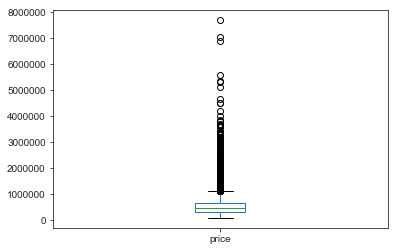

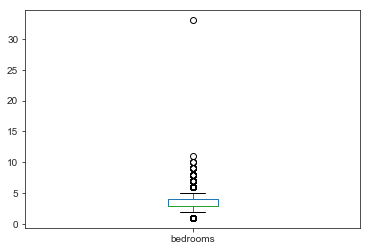

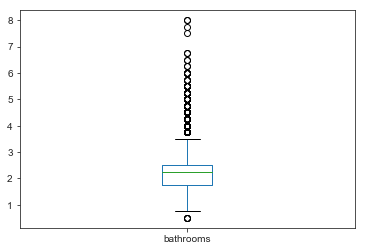

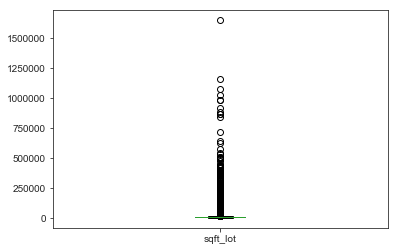

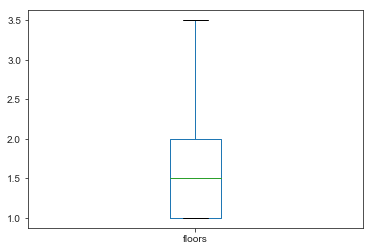

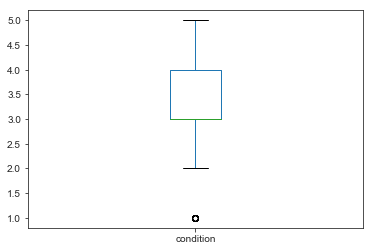

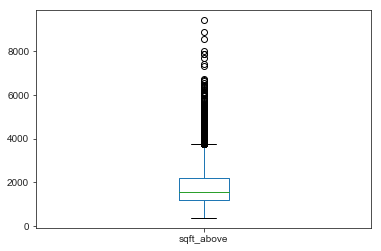

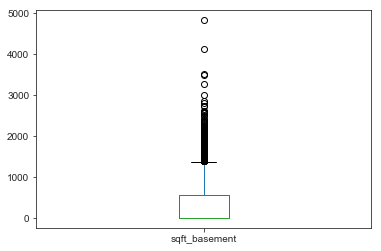

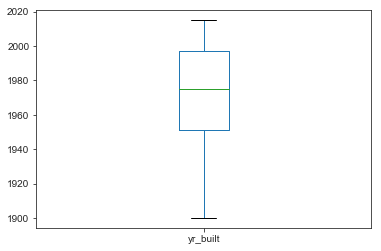

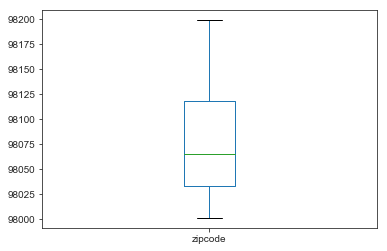

In [46]:
for col in QuantVar:
    data.plot.box(y=col)

In [47]:
for col in QuantVar:
    outliers = data_scaled.index[data_scaled[col]>0.7].tolist()
    print(col, len(outliers))

price 3
bedrooms 1
bathrooms 4
sqft_lot 1
floors 7
condition 0
sqft_above 3
sqft_basement 2
yr_built 0
zipcode 0


In [48]:
for col in QuantVar:
    outliers = data_scaled.index[data[col]>np.percentile(data[col],99.99)].tolist()
    print(col, len(outliers))

price 3
bedrooms 2
bathrooms 3
sqft_lot 3
floors 0
condition 0
sqft_above 3
sqft_basement 3
yr_built 0
zipcode 0


We will filter outliers that are mostly above 99.99% percentiles as shown above. If the observation is normally distributed, the points to be discarded are further than three standard deviations from the mean value.   

Before filter the outliers, we make a copy of the datasets just in case.  

In [49]:
data_withOutlier = data.copy()

In [50]:
data_withOutlier.to_pickle("./withOutlier.pkl")

In [51]:
data_withOutlier.shape

(21597, 14)

In [52]:
Filter =[]
for col in QuantVar:
    outliers = data_scaled.index[data_scaled[col]>0.7].tolist()
    Filter = Filter + outliers
data.drop(Filter, axis = 0, inplace = True)

In [53]:
data.shape

(21582, 14)

In [54]:
data.reset_index(inplace = True)
data.drop('index', axis =1, inplace = True)

In [55]:
data.to_pickle("./data.pkl")

In [56]:
data_withOutlier.shape

(21597, 14)

## 2. Linear Regression Assumptions and Transformation

In [57]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats

First, we want to see how good the least square method work for our data set before any transformation. 

In [58]:
outcome='price'
predictors = data.drop('price', axis =1)
pred_sum = '+'.join(predictors.columns)
formula = outcome +'~'+ pred_sum
model = smf.ols(formula = formula, data = data ).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     2281.
Date:                Tue, 16 Jul 2019   Prob (F-statistic):               0.00
Time:                        08:54:04   Log-Likelihood:            -2.9723e+05
No. Observations:               21582   AIC:                         5.945e+05
Df Residuals:                   21568   BIC:                         5.946e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.936e+06    3.3e+06     -0.891      0.373    -9.4e+06    3.52e+06
bedrooms      -6.388e+04   2240.256    -28.515      0.000   -6.83e+04   -5.95e+04
bathrooms      7.045e+04   3730.103     18.886      0.000    6.31e+04    7.78e+04
sqft_lot         -0.3201      0.041     -7.812      0.000      -0.400      -0.240
floors         4.445e+04   4071.900     10.916      0.000    3.65e+04    5.24e+04
condition       2.18e+04   2696.233      8.085      0.000    1.65e+04    2.71e+04
sqft_above      291.6919      3.102     94.042      0.000     285.612     297.771
sqft_basement   266.0303      4.641     57.319      0.000     256.933     275.127
yr_built      -2946.4092     77.872    -37.836      0.000   -3099.045   -2793.774
zipcode          87.8139     33.055      2.657      0.008      23.024     152.604
water_0        1661.2379   5045.493      0.329      0.742   -8228.302    1.16e+04
water_1        7.445e+05   2.01e+04     37.010      0.000    7.05e+05    7.84e+05
renov_0       -5142.0810   4144.391     -1.241      0.215   -1.33e+04    2981.231
renov_1        2.642e+04   9706.547      2.722      0.007    7391.641    4.54e+04
==============================================================================
Omnibus:                    10938.819   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           197882.361
Skew:                           2.014   Prob(JB):                         0.00
Kurtosis:                      17.277   Cond. No.                     2.08e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* From $R^2$ and $adjust R^2$, the linear model explains about 59% of our dataset. 
* Jarque-Bera(JB) value is too large to say that the normality of residuals is kept.
* We can also see a couple of predictors have too high of p-value to conclude that their coefficients are significant.

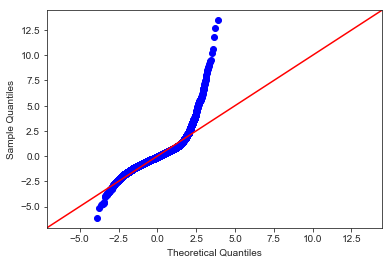

In [59]:
resid = model.resid
fig = sm.graphics.qqplot(resid, dist = stats.norm, line='45',fit=True)

Regression Analysis and Diagnostics for formula: price ~bedrooms
-------------------------------------------------------------------------------------


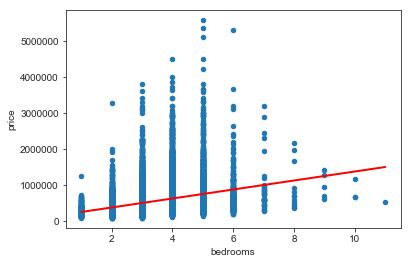

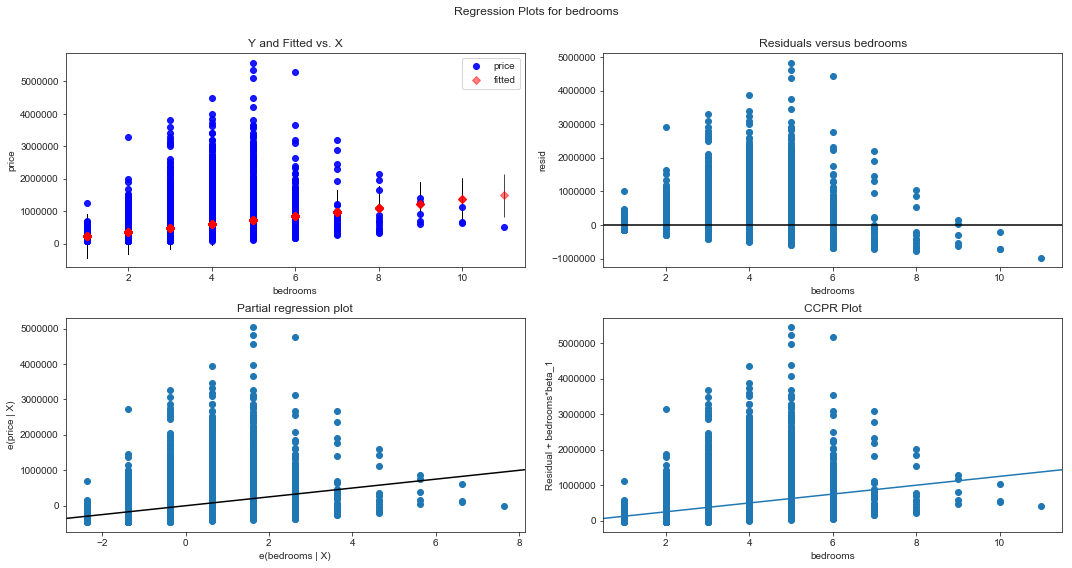

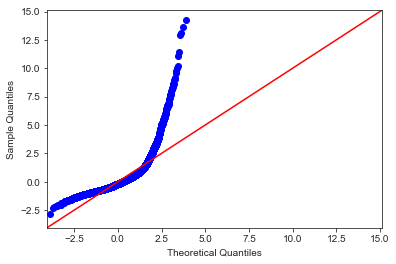

Regression Analysis and Diagnostics for formula: price ~bathrooms
-------------------------------------------------------------------------------------


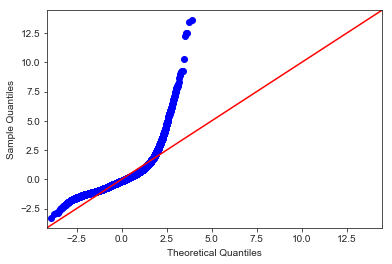

Regression Analysis and Diagnostics for formula: price ~sqft_lot
-------------------------------------------------------------------------------------


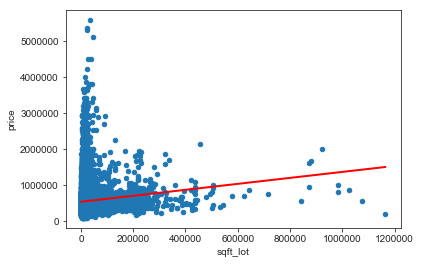

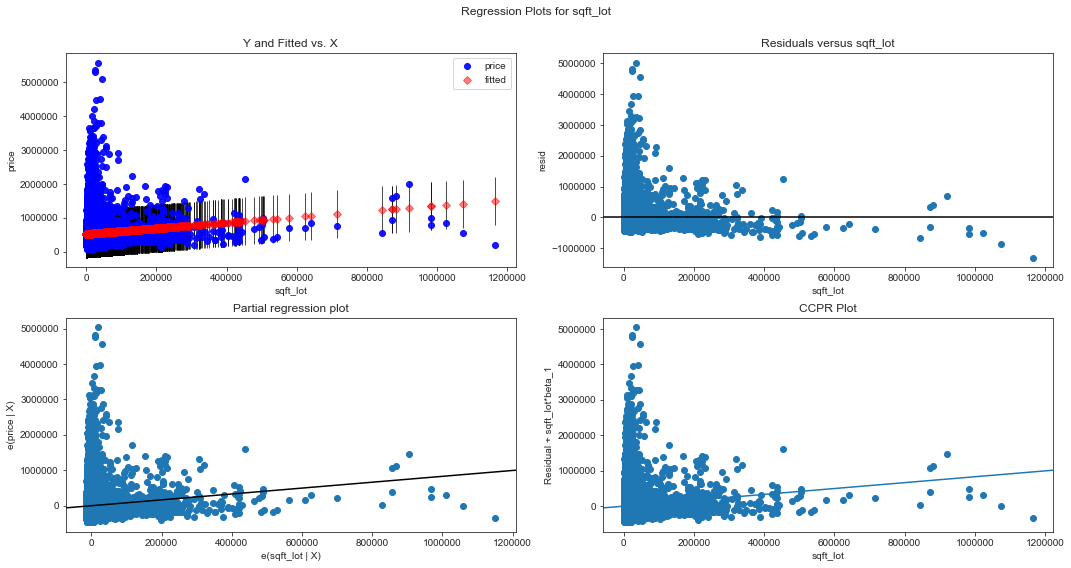

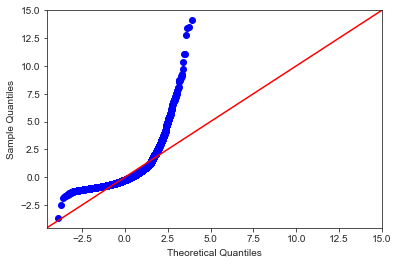

Regression Analysis and Diagnostics for formula: price ~floors
-------------------------------------------------------------------------------------


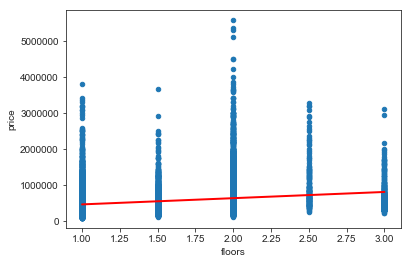

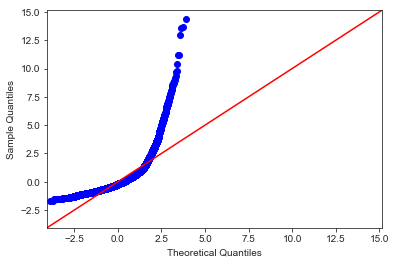

Regression Analysis and Diagnostics for formula: price ~condition
-------------------------------------------------------------------------------------


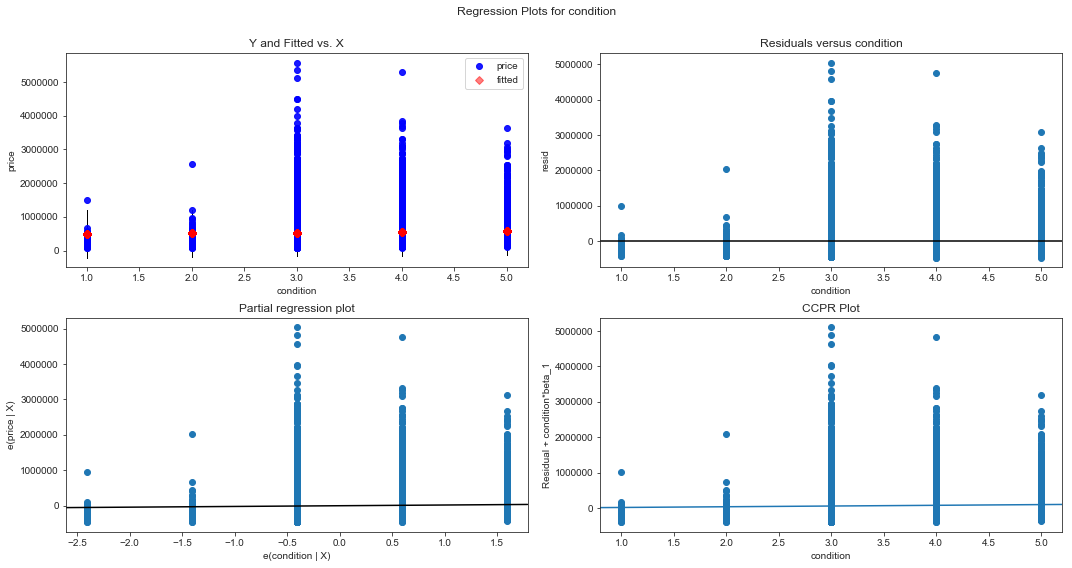

Regression Analysis and Diagnostics for formula: price ~sqft_above
-------------------------------------------------------------------------------------


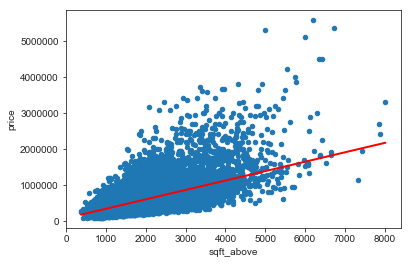

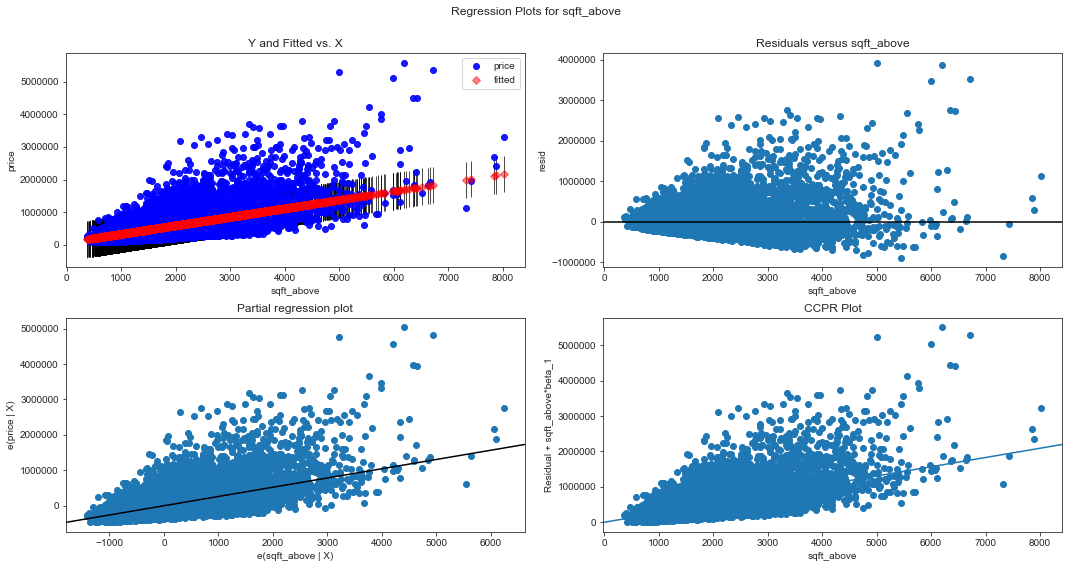

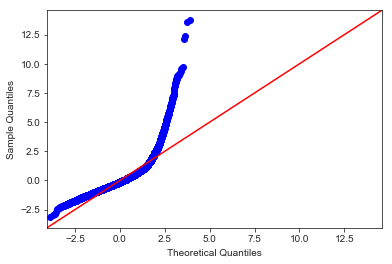

Regression Analysis and Diagnostics for formula: price ~sqft_basement
-------------------------------------------------------------------------------------


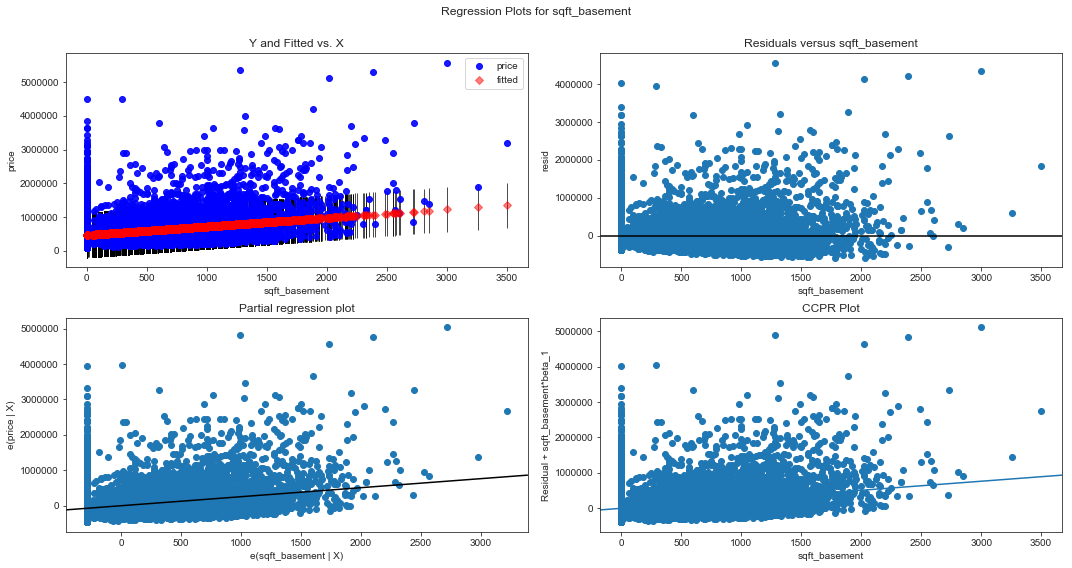

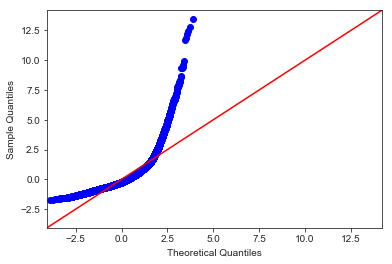

Regression Analysis and Diagnostics for formula: price ~yr_built
-------------------------------------------------------------------------------------


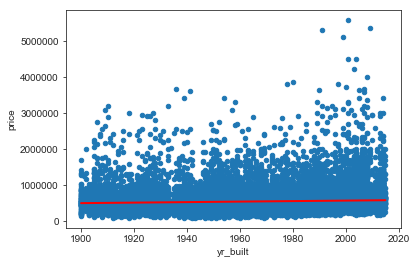

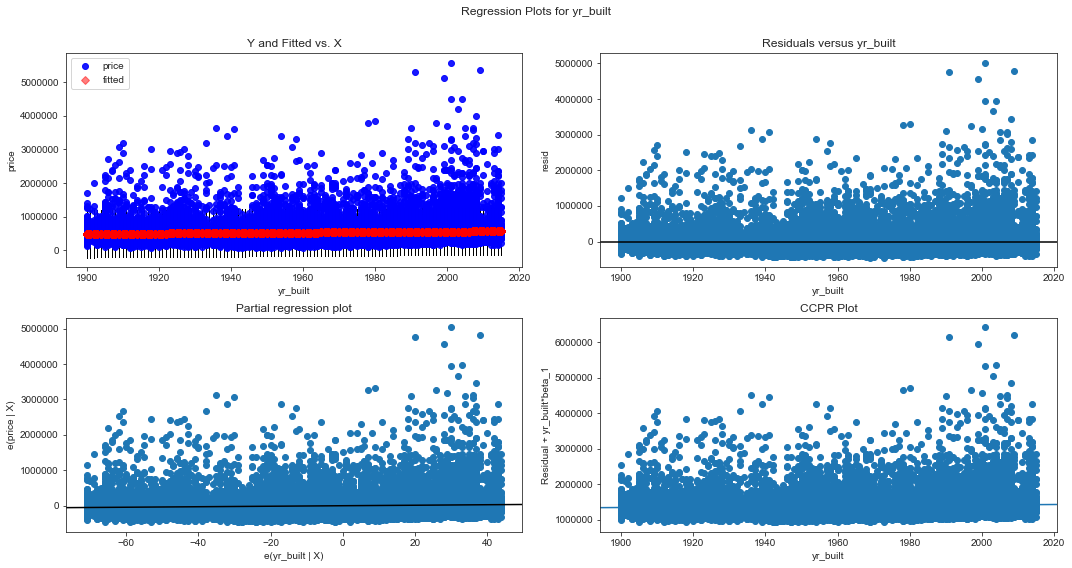

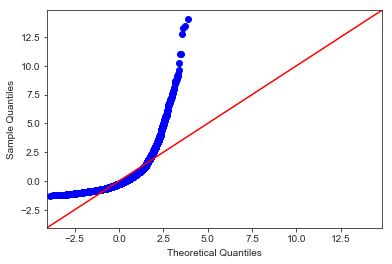

Regression Analysis and Diagnostics for formula: price ~zipcode
-------------------------------------------------------------------------------------


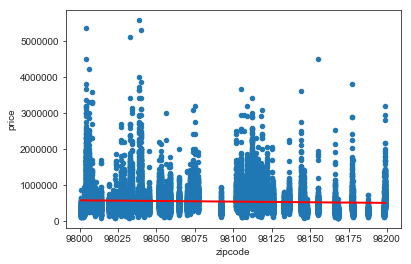

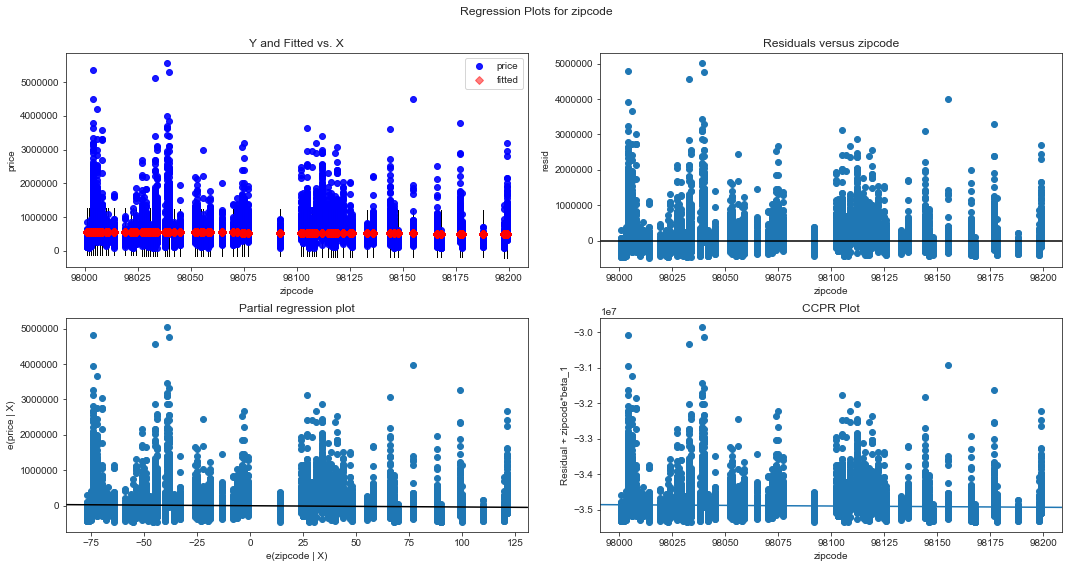

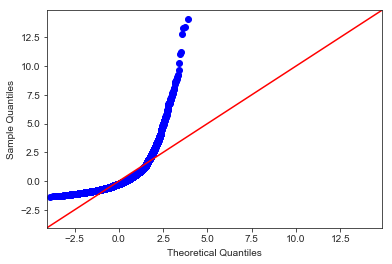

Regression Analysis and Diagnostics for formula: price ~water_0
-------------------------------------------------------------------------------------


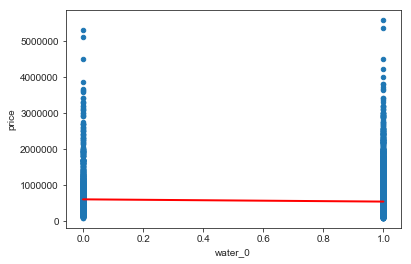

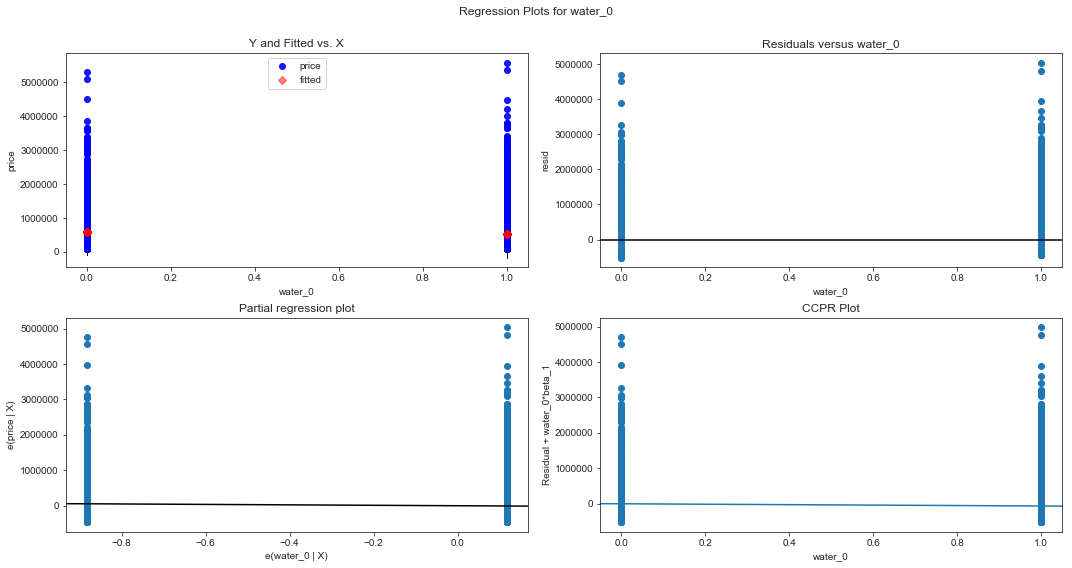

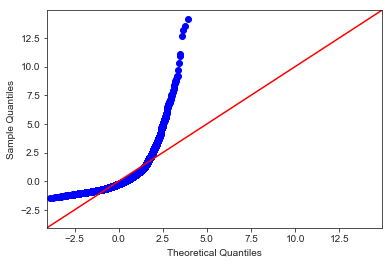

Regression Analysis and Diagnostics for formula: price ~water_1
-------------------------------------------------------------------------------------


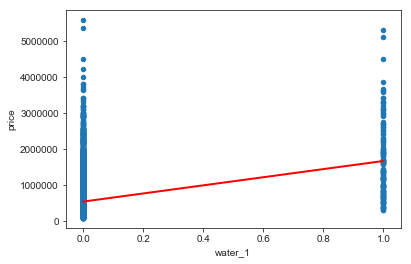

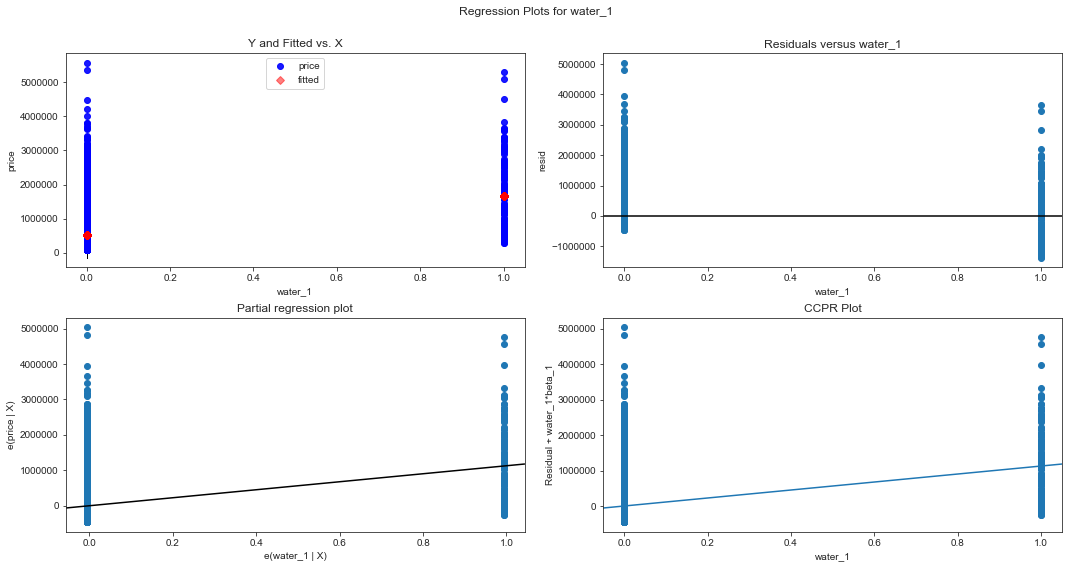

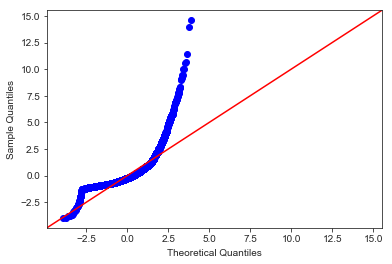

Regression Analysis and Diagnostics for formula: price ~renov_0
-------------------------------------------------------------------------------------


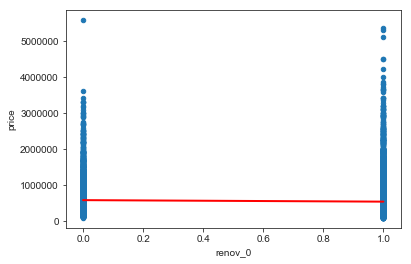

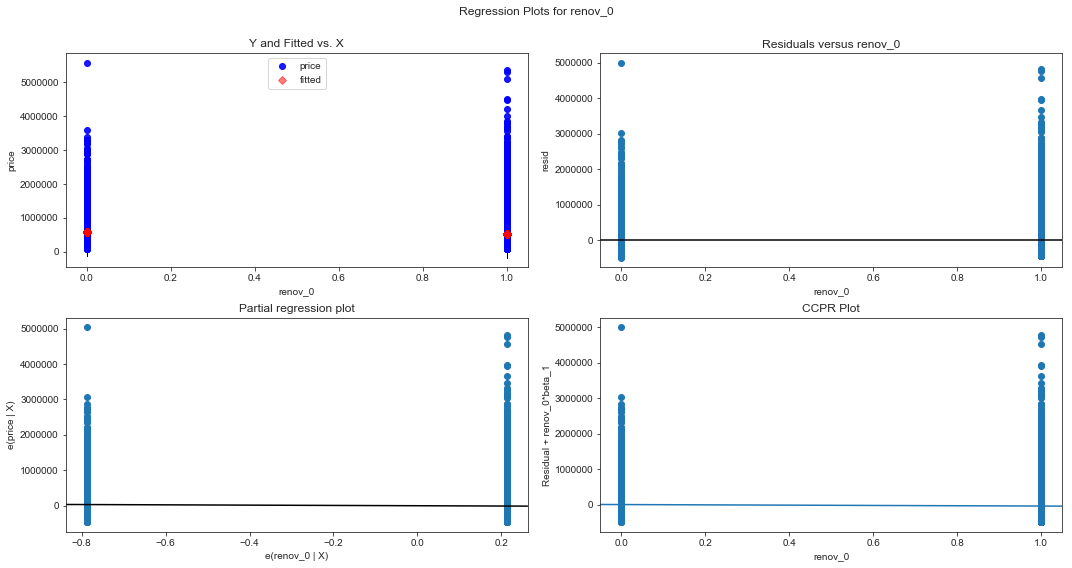

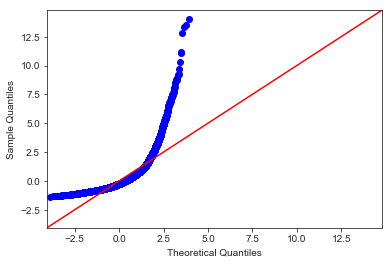

Regression Analysis and Diagnostics for formula: price ~renov_1
-------------------------------------------------------------------------------------


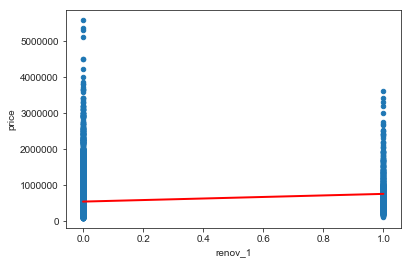

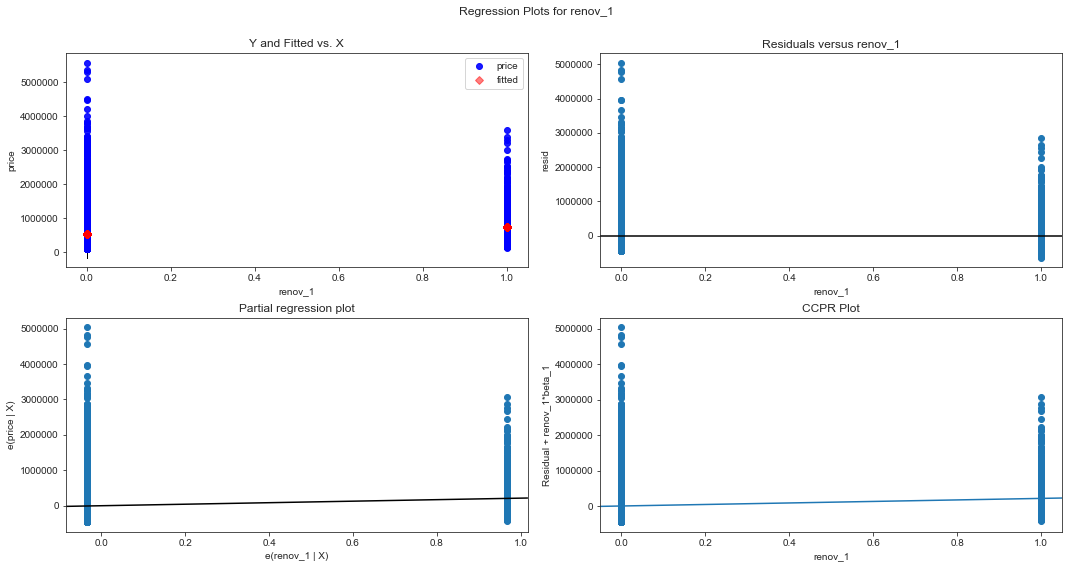

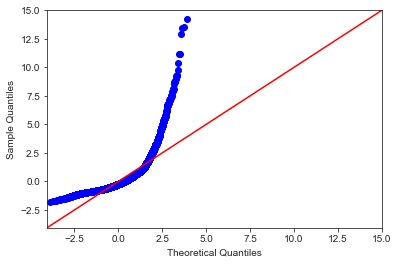

In [60]:
f = ['price ~ '+ col for col in predictors.columns] 

results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ]]
for index, col in enumerate(predictors.columns):
    print ("Regression Analysis and Diagnostics for formula: price ~" + col)
    print ("-------------------------------------------------------------------------------------")

    
    model = smf.ols(formula=f[index], data = data).fit()
    
    X_new = pd.DataFrame({col:[data[col].min(),data[col].max()]})
    preds = model.predict(X_new)
    
    data.plot.scatter(col, 'price')
    plt.plot(X_new, preds, c='r', linewidth = 2)
    plt.show()
    
    fig = plt.figure(figsize = (15,8))
    fig = sm.graphics.plot_regress_exog(model, col, fig= fig)
    fig = sm.graphics.qqplot(model.resid, dist= stats.norm, line='45', fit= True)
    plt.show()
    results.append([col, model.rsquared, model.params[0],
                    model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0] ])
#     input("Press Enter to continue...")

### observations
* From the plots of the residuals against predictor variables shows that the error variance is non constant along most of predictors (heteroscedasticity).  
* From the QQ plot (the normal probability plot of the residuals) of the residual against the normal distribution, the errors are not normally distributed. 

From these two observations, the linear regression is not sufficient with this data set and transformations are needed. 

In [61]:
results_data = pd.DataFrame(results, columns = results[0])
results_data = results_data.set_index(results_data.ind_var).drop('ind_var', axis =1).drop('ind_var', axis = 0)

### First Attempt to get normality of residuals: Fitting predictors with log(price)

In [62]:
log_price = np.log(data.price)
data_logY = data.drop('price', axis =1)
data_logY['log_price'] = log_price
formula2 = 'log_price ~'+ '+'.join(predictors.columns) 
model_log = smf.ols(formula = formula2, data = data_logY ).fit()

In [63]:
data_logY.to_pickle("./data_logY.pkl")

In [64]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     2035.
Date:                Tue, 16 Jul 2019   Prob (F-statistic):               0.00
Time:                        08:54:24   Log-Likelihood:                -8087.0
No. Observations:               21582   AIC:                         1.620e+04
Df Residuals:                   21568   BIC:                         1.631e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -14.5430      5.005     -2.906      0.004     -24.353      -4.733
bedrooms         -0.0668      0.003    -19.630      0.000      -0.073      -0.060
bathrooms         0.1182      0.006     20.857      0.000       0.107       0.129
sqft_lot      -1.581e-07   6.22e-08     -2.541      0.011    -2.8e-07   -3.61e-08
floors            0.1321      0.006     21.354      0.000       0.120       0.144
condition         0.0465      0.004     11.345      0.000       0.038       0.054
sqft_above        0.0004   4.71e-06     81.493      0.000       0.000       0.000
sqft_basement     0.0004   7.05e-06     54.278      0.000       0.000       0.000
yr_built         -0.0041      0.000    -34.796      0.000      -0.004      -0.004
zipcode           0.0004   5.02e-05      7.012      0.000       0.000       0.000
water_0           0.0030      0.008      0.392      0.695      -0.012       0.018
water_1           0.5229      0.031     17.116      0.000       0.463       0.583
renov_0          -0.0058      0.006     -0.918      0.359      -0.018       0.007
renov_1           0.0459      0.015      3.116      0.002       0.017       0.075
==============================================================================
Omnibus:                       30.429   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.428
Skew:                          -0.075   Prob(JB):                     1.50e-07
Kurtosis:                       3.111   Cond. No.                     2.08e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Observations
* $R^2$ and $adjust R^2$ dropped to 55% but JB, F-value and AIC values decreased dramatically. 
* From decreased JB indicates that the normality of residuals has been improved although the value is still too high to conclude the normality of errors. 

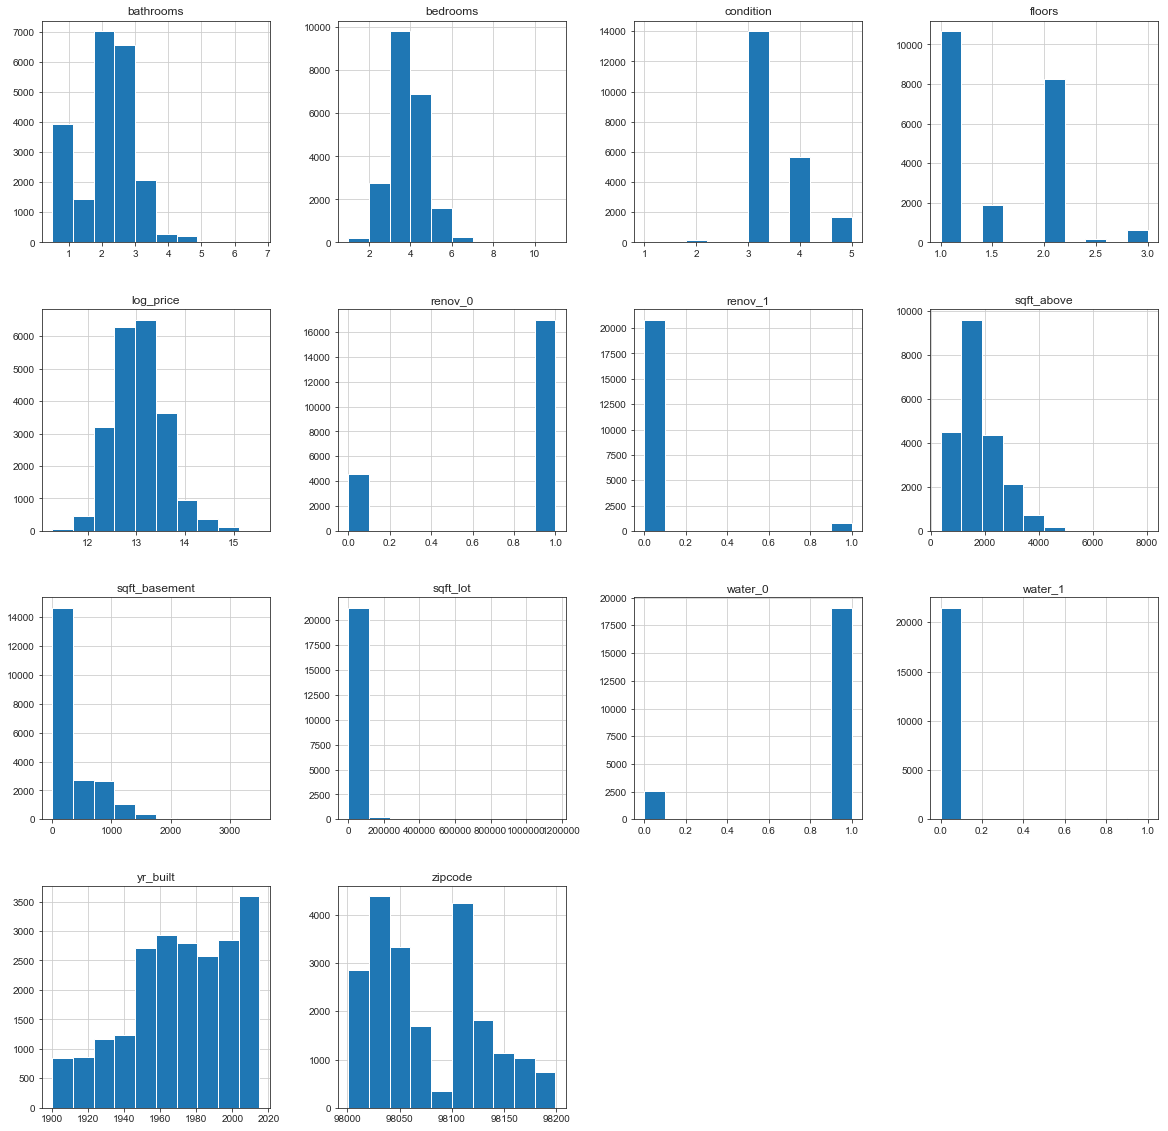

In [65]:
data_logY.hist(figsize=(20,20));

Regression Analysis and Diagnostics for formula: log(price) ~bedrooms
-------------------------------------------------------------------------------------


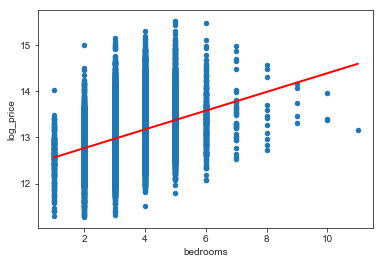

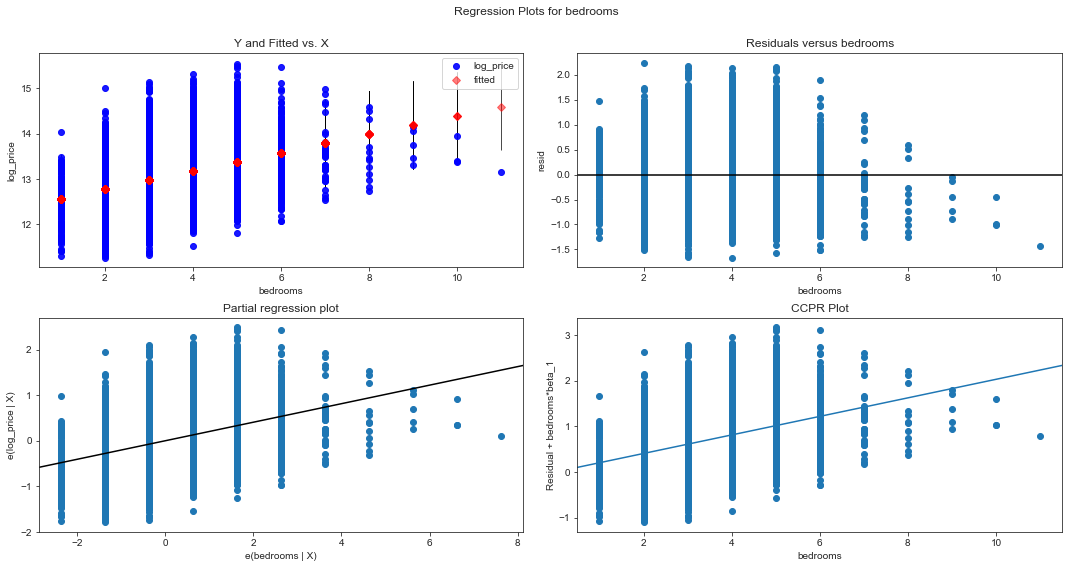

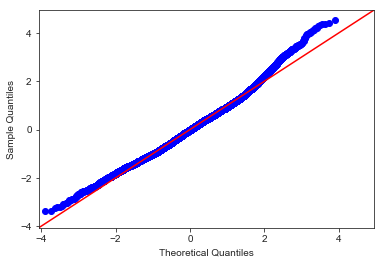

Regression Analysis and Diagnostics for formula: log(price) ~bathrooms
-------------------------------------------------------------------------------------


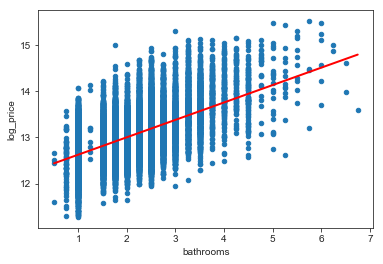

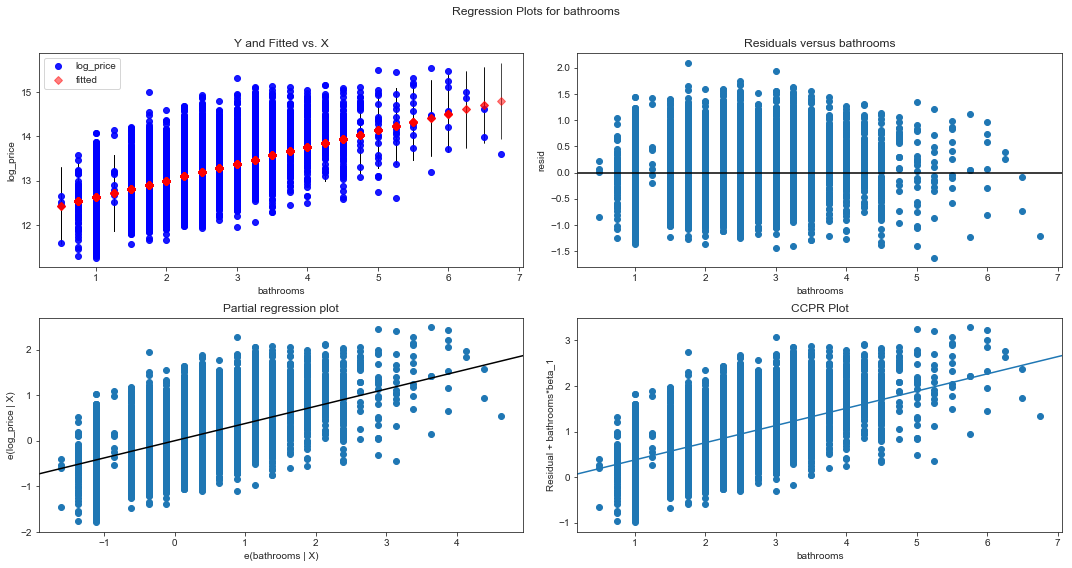

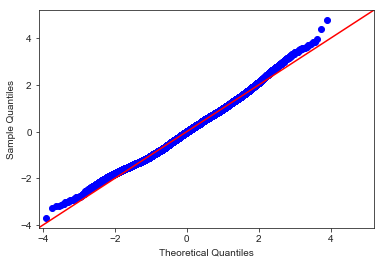

Regression Analysis and Diagnostics for formula: log(price) ~sqft_lot
-------------------------------------------------------------------------------------


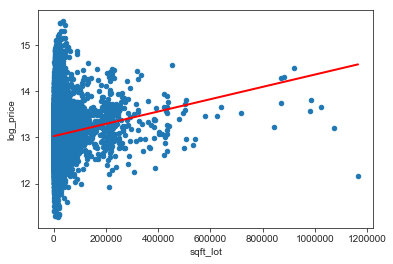

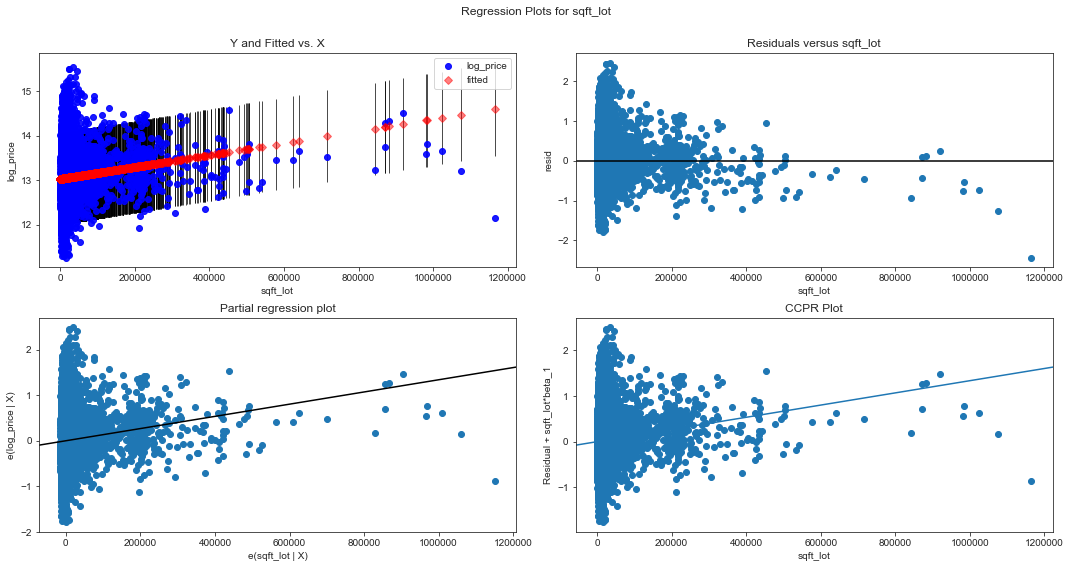

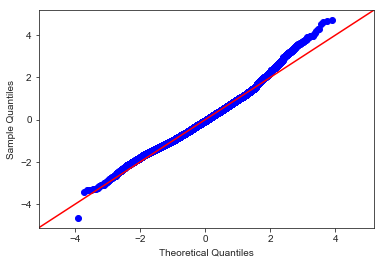

Regression Analysis and Diagnostics for formula: log(price) ~floors
-------------------------------------------------------------------------------------


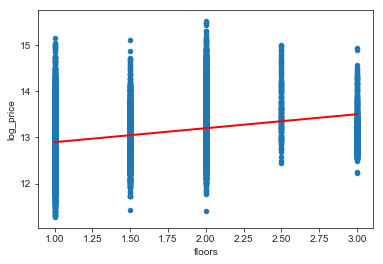

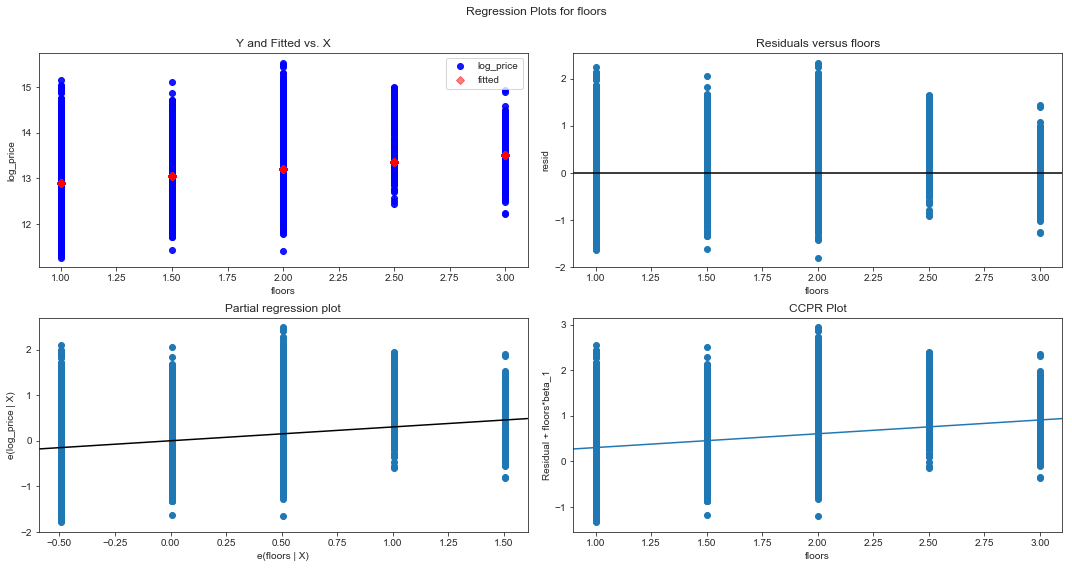

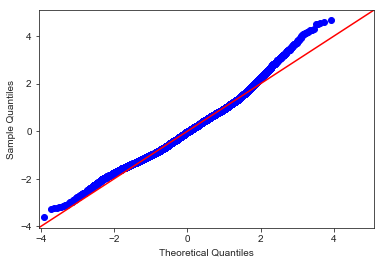

Regression Analysis and Diagnostics for formula: log(price) ~condition
-------------------------------------------------------------------------------------


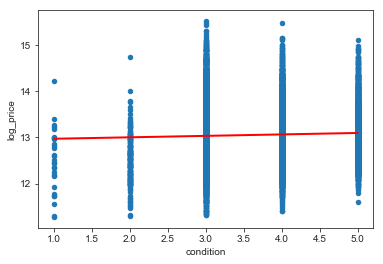

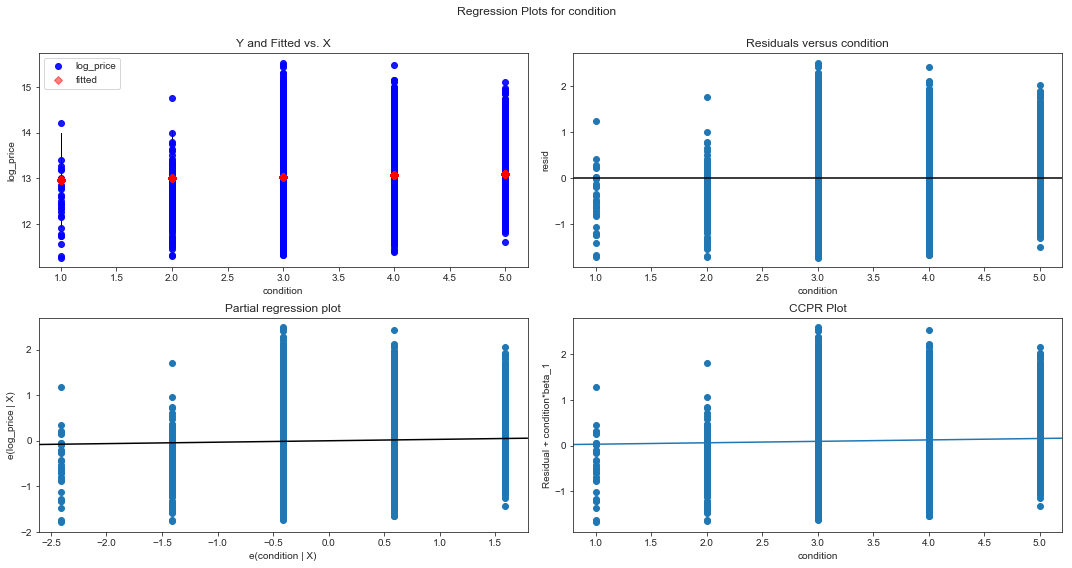

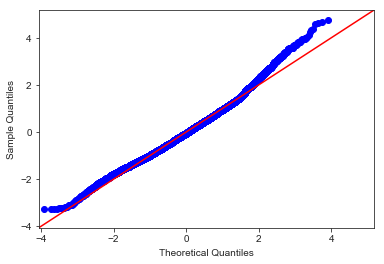

Regression Analysis and Diagnostics for formula: log(price) ~sqft_above
-------------------------------------------------------------------------------------


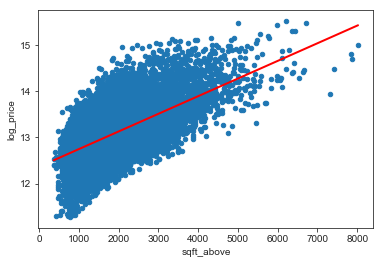

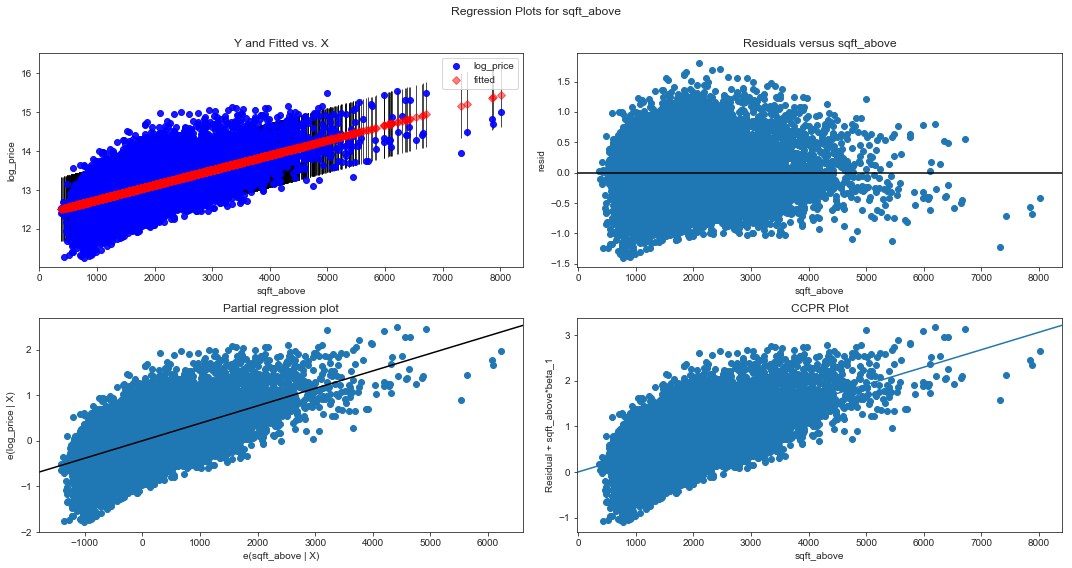

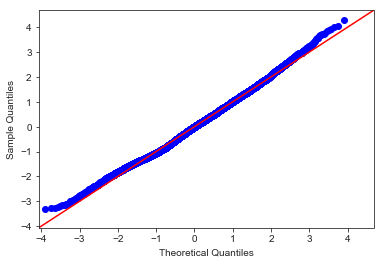

Regression Analysis and Diagnostics for formula: log(price) ~sqft_basement
-------------------------------------------------------------------------------------


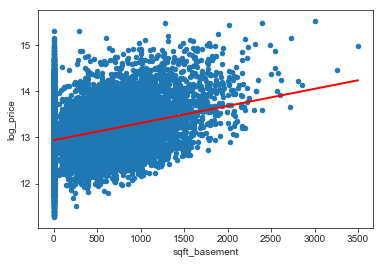

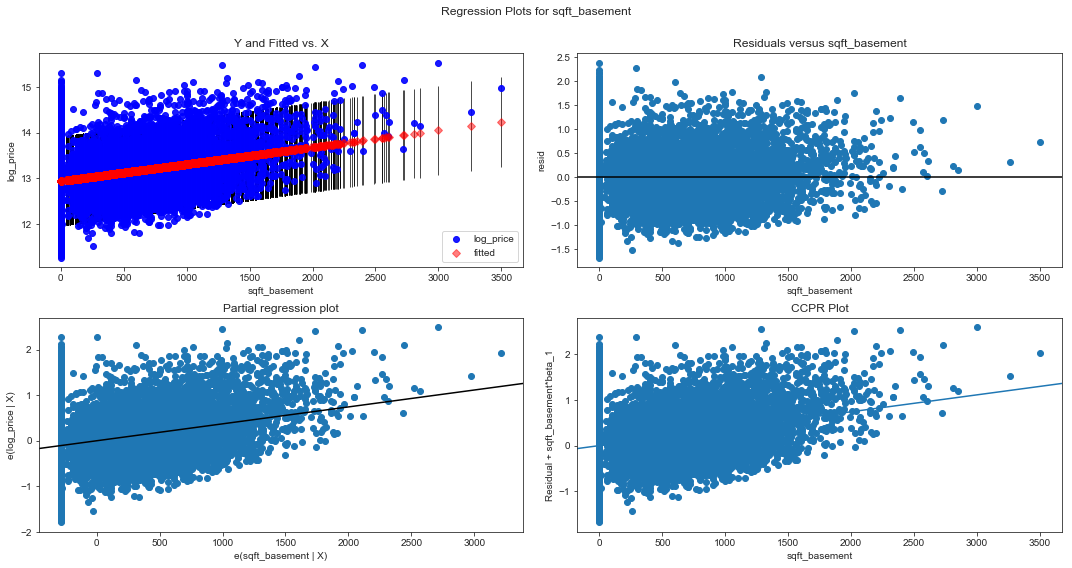

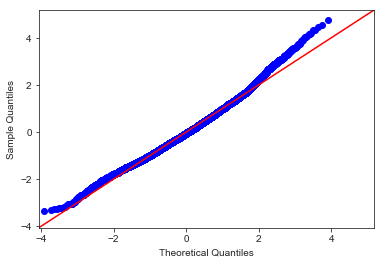

Regression Analysis and Diagnostics for formula: log(price) ~yr_built
-------------------------------------------------------------------------------------


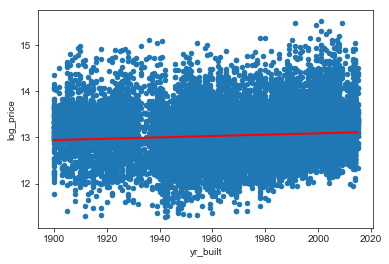

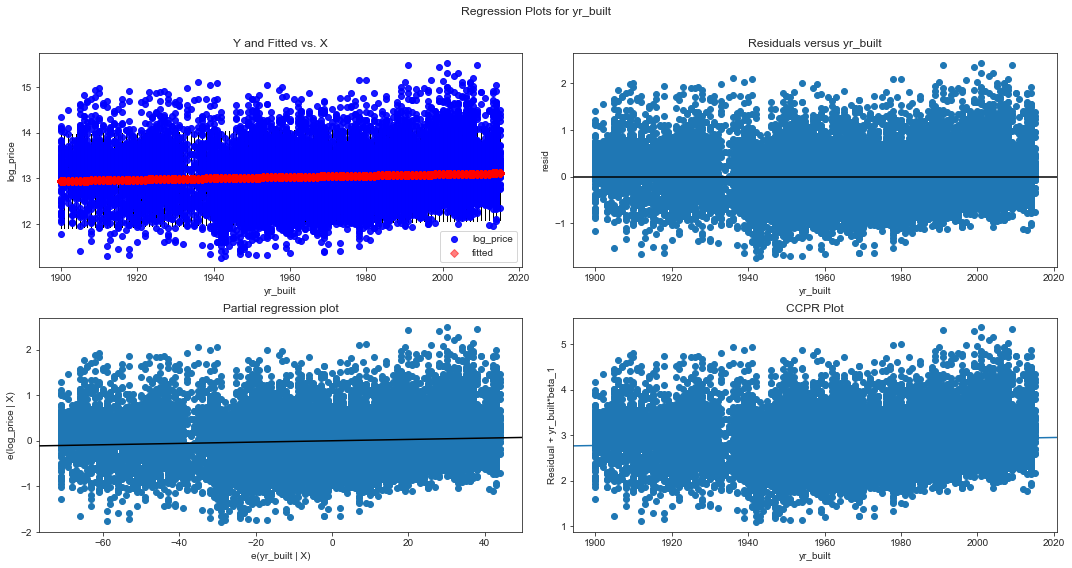

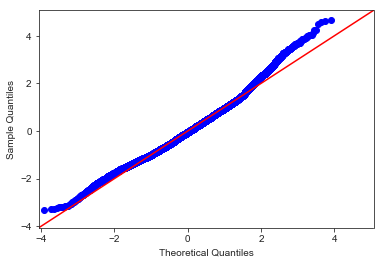

Regression Analysis and Diagnostics for formula: log(price) ~zipcode
-------------------------------------------------------------------------------------


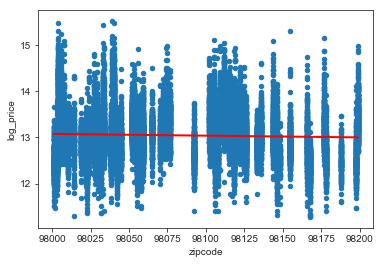

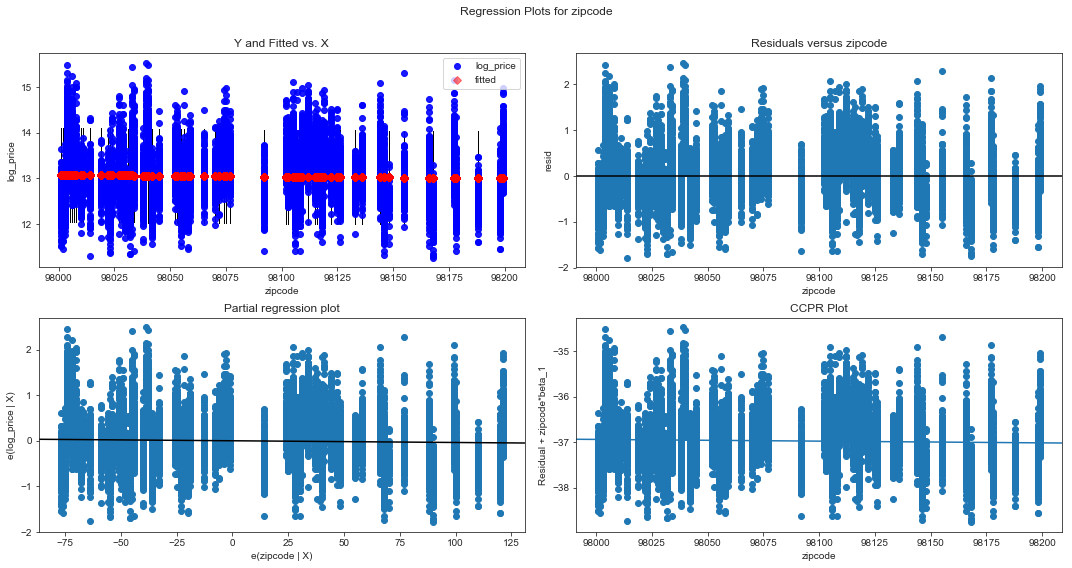

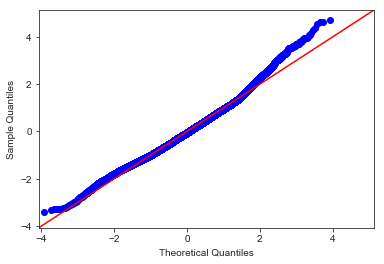

Regression Analysis and Diagnostics for formula: log(price) ~water_0
-------------------------------------------------------------------------------------


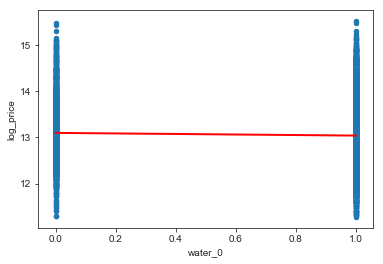

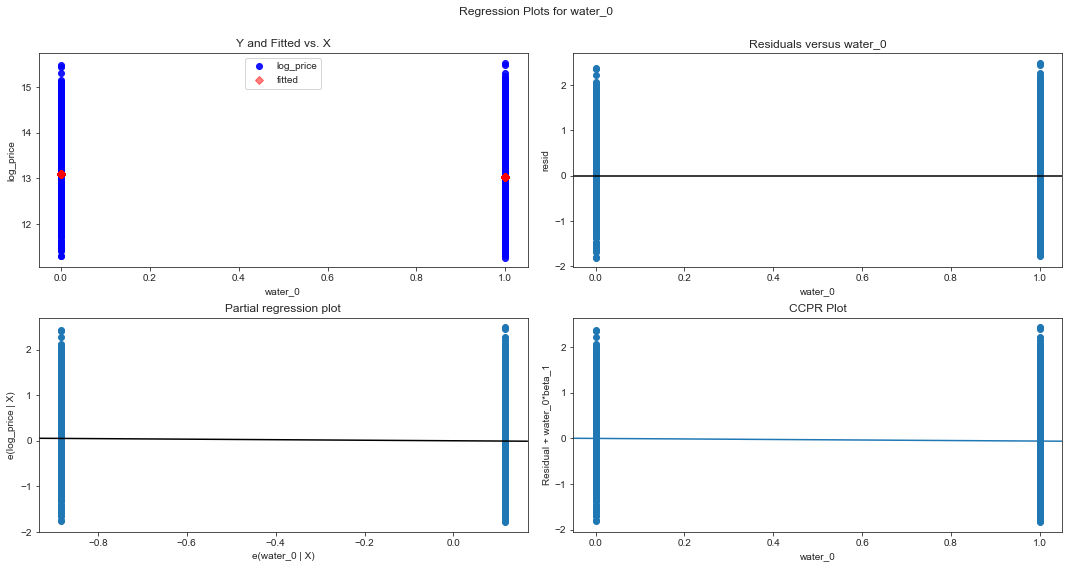

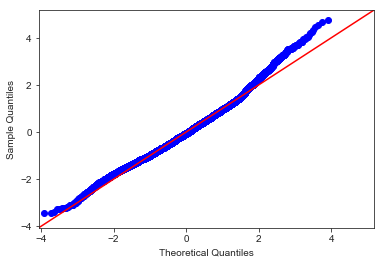

Regression Analysis and Diagnostics for formula: log(price) ~water_1
-------------------------------------------------------------------------------------


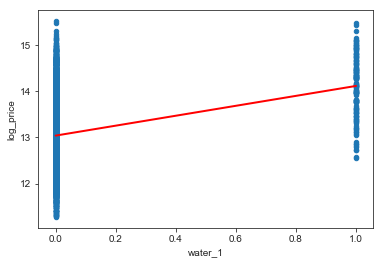

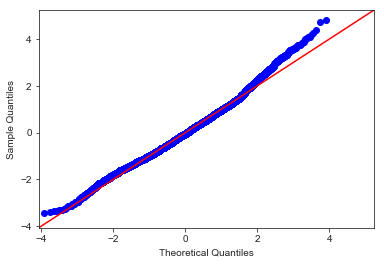

Regression Analysis and Diagnostics for formula: log(price) ~renov_0
-------------------------------------------------------------------------------------


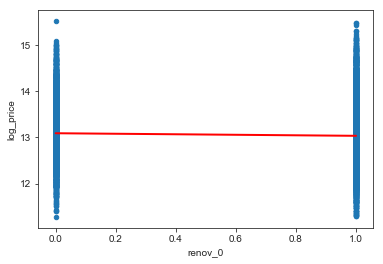

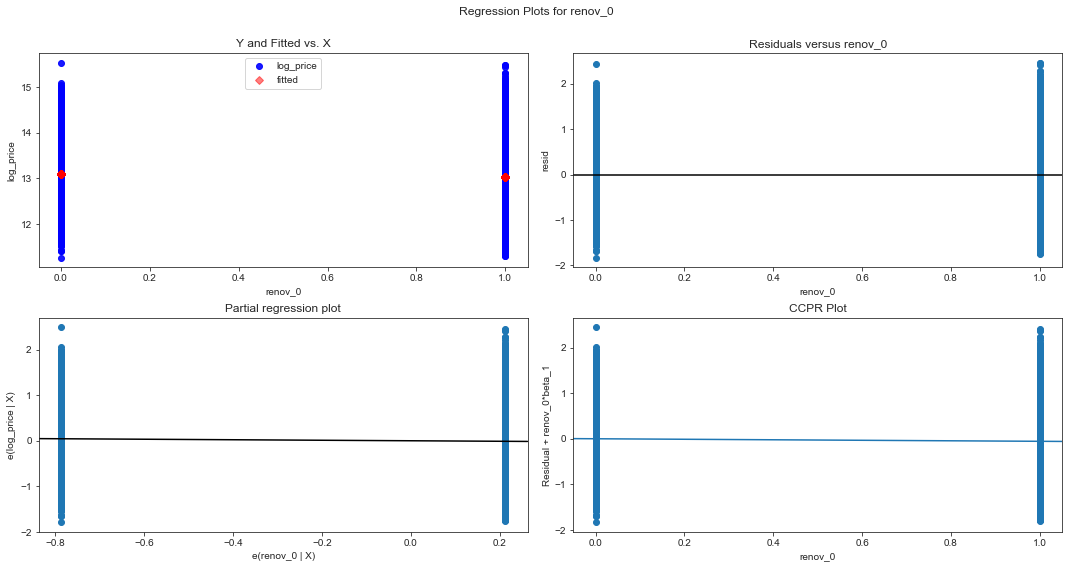

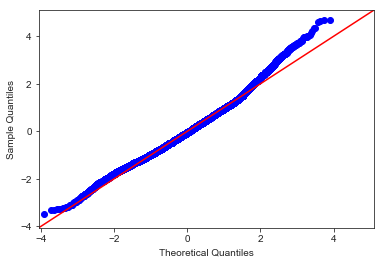

Regression Analysis and Diagnostics for formula: log(price) ~renov_1
-------------------------------------------------------------------------------------


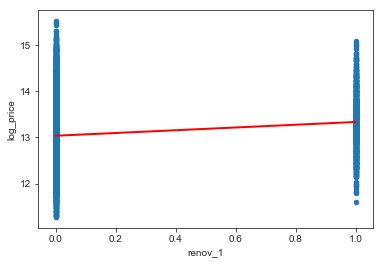

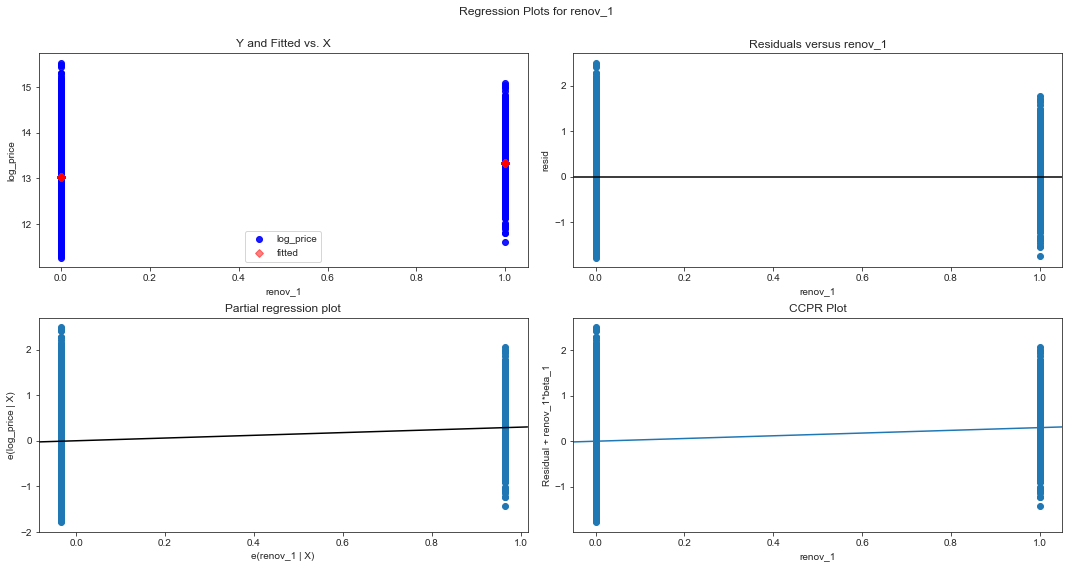

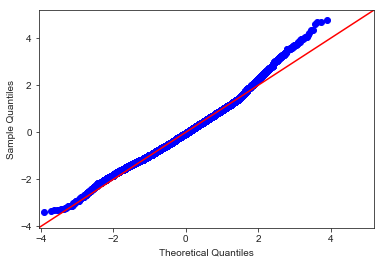

In [66]:
f = ['log_price ~ '+ col for col in predictors.columns] 

results_logY = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ]]
for index, col in enumerate(predictors.columns):
    print ("Regression Analysis and Diagnostics for formula: log(price) ~" + col)
    print ("-------------------------------------------------------------------------------------")

    
    model_logY = smf.ols(formula=f[index], data = data_logY).fit()
    
    X_new = pd.DataFrame({col:[data_logY[col].min(),data_logY[col].max()]})
    preds = model_logY.predict(X_new)
    
    data_logY.plot.scatter(col, 'log_price')
    plt.plot(X_new, preds, c='r', linewidth = 2)
    plt.show()
    
    fig = plt.figure(figsize = (15,8))
    fig = sm.graphics.plot_regress_exog(model_logY, col, fig= fig)
    fig = sm.graphics.qqplot(model_logY.resid, dist= stats.norm, line='45', fit= True)
    plt.show()
    results_logY.append([col, model_logY.rsquared, model_logY.params[0],
                    model_logY.params[1], model_logY.pvalues[1], sms.jarque_bera(model_logY.resid)[0] ])
#     input("Press Enter to continue...")

In [67]:
results_logY = pd.DataFrame(results_logY, columns = results[0])
results_logY = results_logY.set_index(results_logY.ind_var).drop('ind_var', axis =1).drop('ind_var', axis = 0)

In [68]:
results_logY

r_squared intercept        slope      p-value normality (JB)
ind_var                                                                     
bedrooms         0.121904   12.3623     0.203278            0        569.044
bathrooms        0.301781   12.2493     0.377509            0         196.82
sqft_lot        0.0103026   13.0274  1.33775e-06   1.5767e-50        943.172
floors          0.0963881   12.5953     0.302829            0        886.705
condition      0.00150896   12.9406    0.0313635   1.1396e-08        920.405
sqft_above       0.359062   12.3631  0.000382966            0        129.963
sqft_basement   0.0953828   12.9417  0.000371032            0        654.231
yr_built       0.00665841   10.1712   0.00145929  3.26863e-33        959.999
zipcode        0.00147548   50.0172 -0.000376942  1.65379e-08        883.226
water_0        0.00126784   13.0989   -0.0582421  1.67444e-07        881.488
water_1         0.0279068   13.0403       1.0777  7.5758e-135         609.66
renov_0         0.0018924   13.0915   -0.0558688  1.62232e-10        908.214
renov_1         0.0107132   13.0372     0.298543  1.75668e-52        879.679

In [69]:
crossVal = dict()#store cross validation values for different transformation 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
X1= data_logY.drop('log_price', axis = 1)
y1 = data_logY.log_price

linreg= LinearRegression()
linreg.fit(X1, y1)

cv_5_results = cross_val_score(linreg, X1, y1, cv =5, scoring ='neg_mean_squared_error')
crossVal['logY'] = abs(np.mean(cv_5_results))
print(abs(np.mean(cv_5_results)))

0.12496078587606232


### Mean normalization is applied on quantitative variables. (data_logY2)

In [70]:
data_logY2 = data_logY.copy()

for col in data_logY.columns[:-5]:
    data_logY2[col] = data_scaled[col]

In [71]:
X2 = data_logY2.drop('log_price', axis =1)
formula = 'log_price ~' + '+'.join(X2.columns)
model_log2 = smf.ols(formula = formula, data = data_logY2 ).fit()

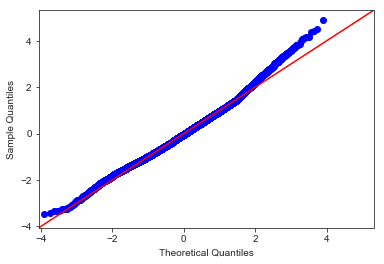

In [72]:
resid_logY2 = model_log2.resid
fig = sm.graphics.qqplot(resid_logY2, dist = stats.norm, line='45',fit=True)

In [73]:
model_log2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     73.38
Date:                Tue, 16 Jul 2019   Prob (F-statistic):          2.99e-191
Time:                        08:54:47   Log-Likelihood:                -16258.
No. Observations:               21582   AIC:                         3.254e+04
Df Residuals:                   21568   BIC:                         3.266e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.0318      0.013   1006.709      0.000      13.006      13.057
bedrooms         -0.5735      0.152     -3.777      0.000      -0.871      -0.276
bathrooms         0.0795      0.061      1.297      0.195      -0.041       0.200
sqft_lot         -0.1734      0.144     -1.205      0.228      -0.456       0.109
floors            0.0753      0.022      3.349      0.001       0.031       0.119
condition        -0.0101      0.024     -0.427      0.669      -0.056       0.036
sqft_above        0.2875      0.061      4.696      0.000       0.168       0.407
sqft_basement     0.1669      0.049      3.405      0.001       0.071       0.263
yr_built          0.0140      0.019      0.737      0.461      -0.023       0.051
zipcode           0.0379      0.014      2.614      0.009       0.009       0.066
water_0           0.0056      0.011      0.498      0.618      -0.016       0.028
water_1           1.0289      0.044     23.258      0.000       0.942       1.116
renov_0          -0.0066      0.009     -0.717      0.473      -0.025       0.011
renov_1           0.2667      0.021     12.893      0.000       0.226       0.307
==============================================================================
Omnibus:                      481.547   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              557.811
Skew:                           0.323   Prob(JB):                    7.46e-122
Kurtosis:                       3.449   Cond. No.                         70.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
X2= data_logY2.drop('log_price', axis = 1)
y2 = data_logY2.log_price

linreg= LinearRegression()
linreg.fit(X2, y2)

cv_5_results = cross_val_score(linreg, X2, y2, cv =5, scoring ='neg_mean_squared_error')
crossVal['logYnormalized'] = abs(np.mean(cv_5_results))
print(abs(np.mean(cv_5_results)))  

0.2670553990767271


It turns out, applying mean normalization made the model worse! So we will stick with the model with the log transformation on the target variable only!

### Stepwise Selection

In [75]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [76]:
y3 = data_logY.log_price
X3 = data_logY.drop('log_price', axis = 1)

In [77]:
result = stepwise_selection(X3, y3, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True)

Add  floors                         with p-value 0.0
Add  bedrooms                       with p-value 0.0
Add  sqft_basement                  with p-value 0.0
Add  bathrooms                      with p-value 0.0
Add  sqft_above                     with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  water_1                        with p-value 1.11359e-70
Add  condition                      with p-value 8.12245e-24
Add  zipcode                        with p-value 1.18333e-12
Add  renov_1                        with p-value 0.000288048


In [78]:
X3_new = X3[result]
X3_new.head()

floors  bedrooms  sqft_basement  bathrooms  sqft_above  yr_built  water_1  \
0     1.0         3            0.0       1.00        1180      1955        0   
1     2.0         3          400.0       2.25        2170      1951        0   
2     1.0         2            0.0       1.00         770      1933        0   
3     1.0         4          910.0       3.00        1050      1965        0   
4     1.0         3            0.0       2.00        1680      1987        0   

   condition  zipcode  renov_1  
0          3    98178        0  
1          3    98125        1  
2          3    98028        0  
3          5    98136        0  
4          3    98074        0

In [79]:
data_logYselected = data_logY[result]
data_logYselected['log_price'] = data_logY.log_price

C:\Users\woogu\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [80]:
data_logYselected.to_pickle('./logYselected.pkl')

In [81]:
formula = 'log_price ~' + '+'.join(X3_new.columns)
model_logY = smf.ols(formula = formula, data = data_logYselected).fit()
model_logY.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     2644.
Date:                Tue, 16 Jul 2019   Prob (F-statistic):               0.00
Time:                        08:54:48   Log-Likelihood:                -8090.8
No. Observations:               21582   AIC:                         1.620e+04
Df Residuals:                   21571   BIC:                         1.629e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -15.5459      4.989     -3.116      0.002     -25.325      -5.767
floors            0.1335      0.006     21.680      0.000       0.121       0.146
bedrooms         -0.0660      0.003    -19.487      0.000      -0.073      -0.059
sqft_basement     0.0004   7.04e-06     54.212      0.000       0.000       0.000
bathrooms         0.1184      0.006     20.908      0.000       0.107       0.130
sqft_above        0.0004   4.62e-06     82.648      0.000       0.000       0.000
yr_built         -0.0041      0.000    -34.825      0.000      -0.004      -0.004
water_1           0.5201      0.030     17.455      0.000       0.462       0.578
condition         0.0464      0.004     11.342      0.000       0.038       0.054
zipcode           0.0004      5e-05      7.239      0.000       0.000       0.000
renov_1           0.0503      0.014      3.626      0.000       0.023       0.077
==============================================================================
Omnibus:                       29.823   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.867
Skew:                          -0.074   Prob(JB):                     1.98e-07
Kurtosis:                       3.113   Cond. No.                     2.04e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Let's compare before and after the stepwise selection steps.  

In [82]:
formula = 'log_price ~' + '+'.join(X3.columns)
model = smf.ols(formula = formula, data = data_logY).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     2035.
Date:                Tue, 16 Jul 2019   Prob (F-statistic):               0.00
Time:                        08:54:48   Log-Likelihood:                -8087.0
No. Observations:               21582   AIC:                         1.620e+04
Df Residuals:                   21568   BIC:                         1.631e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -14.5430      5.005     -2.906      0.004     -24.353      -4.733
bedrooms         -0.0668      0.003    -19.630      0.000      -0.073      -0.060
bathrooms         0.1182      0.006     20.857      0.000       0.107       0.129
sqft_lot      -1.581e-07   6.22e-08     -2.541      0.011    -2.8e-07   -3.61e-08
floors            0.1321      0.006     21.354      0.000       0.120       0.144
condition         0.0465      0.004     11.345      0.000       0.038       0.054
sqft_above        0.0004   4.71e-06     81.493      0.000       0.000       0.000
sqft_basement     0.0004   7.05e-06     54.278      0.000       0.000       0.000
yr_built         -0.0041      0.000    -34.796      0.000      -0.004      -0.004
zipcode           0.0004   5.02e-05      7.012      0.000       0.000       0.000
water_0           0.0030      0.008      0.392      0.695      -0.012       0.018
water_1           0.5229      0.031     17.116      0.000       0.463       0.583
renov_0          -0.0058      0.006     -0.918      0.359      -0.018       0.007
renov_1           0.0459      0.015      3.116      0.002       0.017       0.075
==============================================================================
Omnibus:                       30.429   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.428
Skew:                          -0.075   Prob(JB):                     1.50e-07
Kurtosis:                       3.111   Cond. No.                     2.08e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Regression Analysis and Diagnostics for formula: log(price) ~floors
-------------------------------------------------------------------------------------


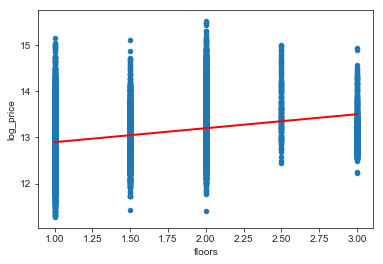

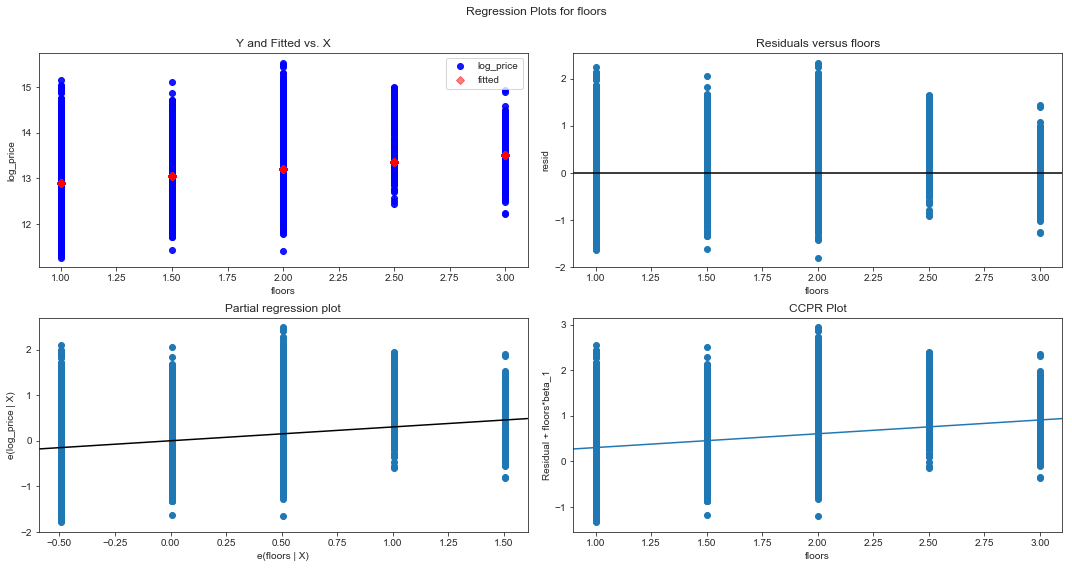

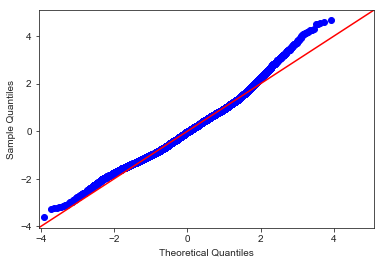

Regression Analysis and Diagnostics for formula: log(price) ~bedrooms
-------------------------------------------------------------------------------------


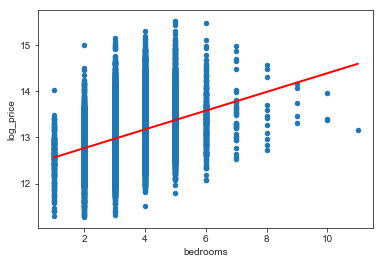

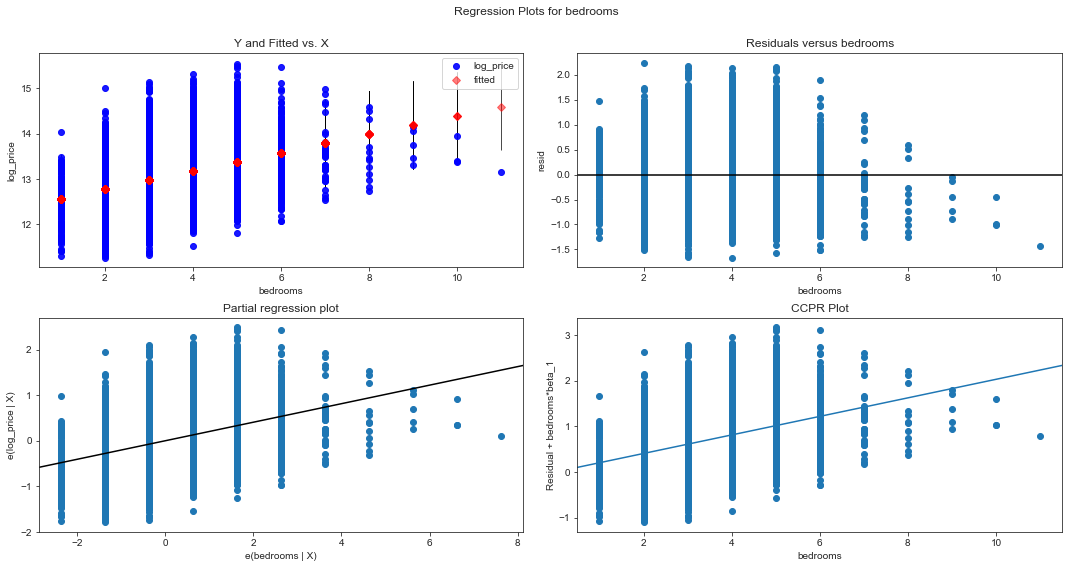

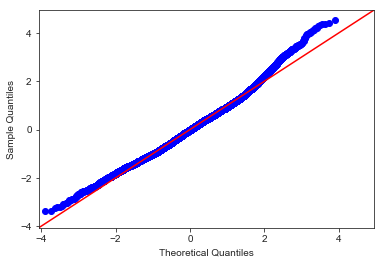

Regression Analysis and Diagnostics for formula: log(price) ~sqft_basement
-------------------------------------------------------------------------------------


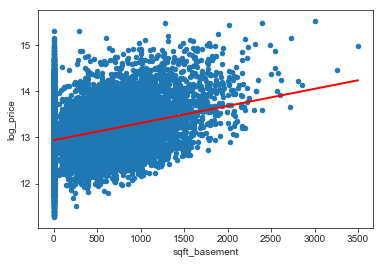

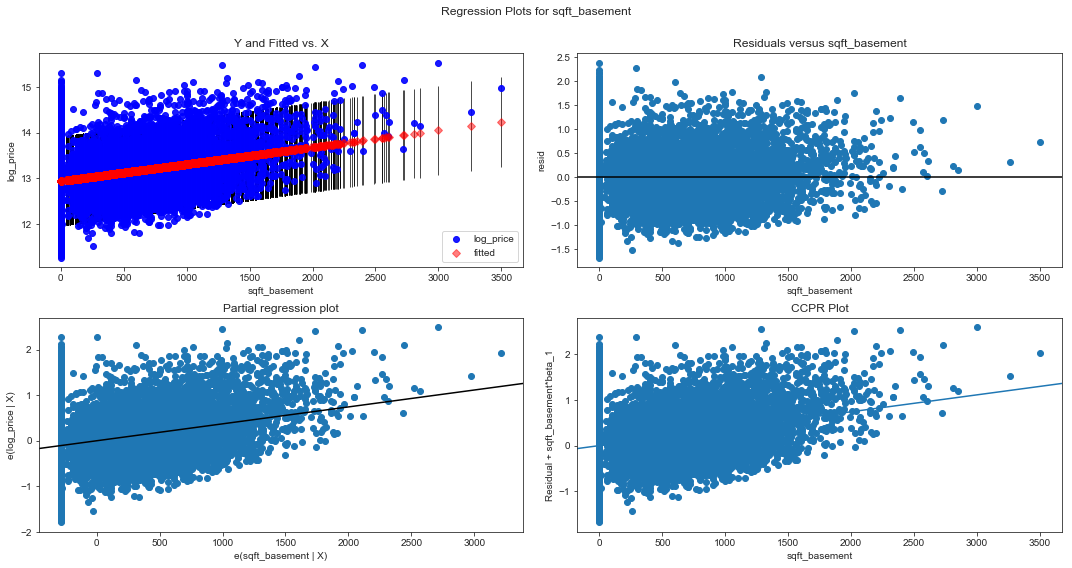

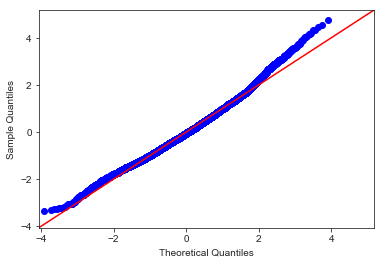

Regression Analysis and Diagnostics for formula: log(price) ~bathrooms
-------------------------------------------------------------------------------------


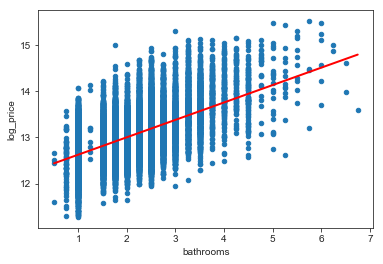

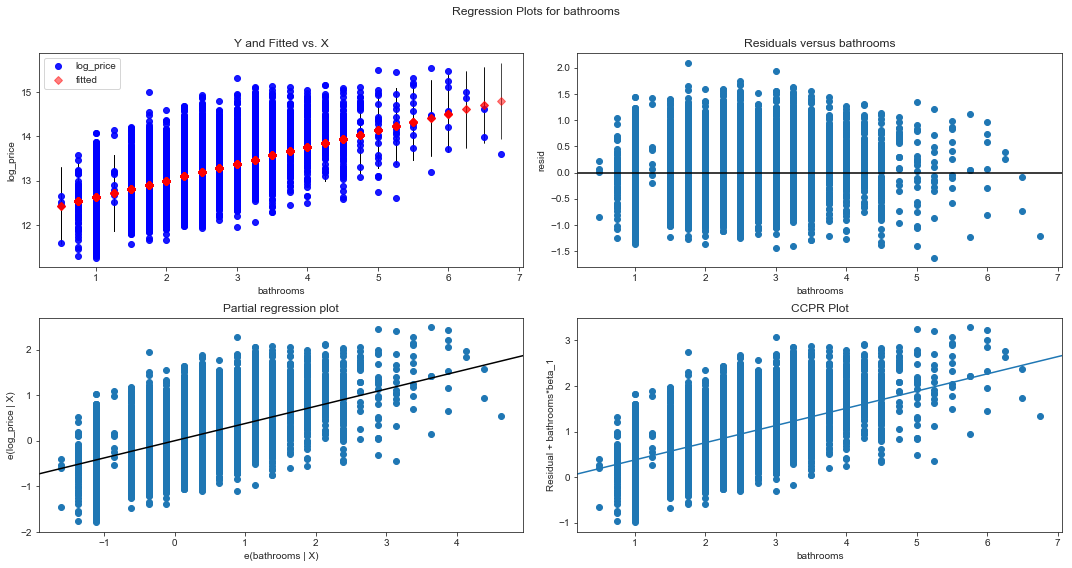

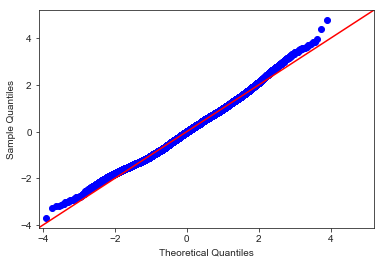

Regression Analysis and Diagnostics for formula: log(price) ~sqft_above
-------------------------------------------------------------------------------------


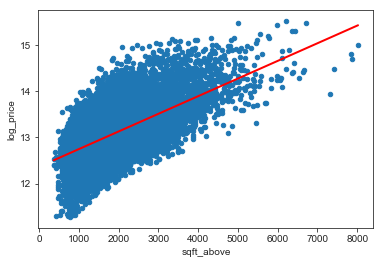

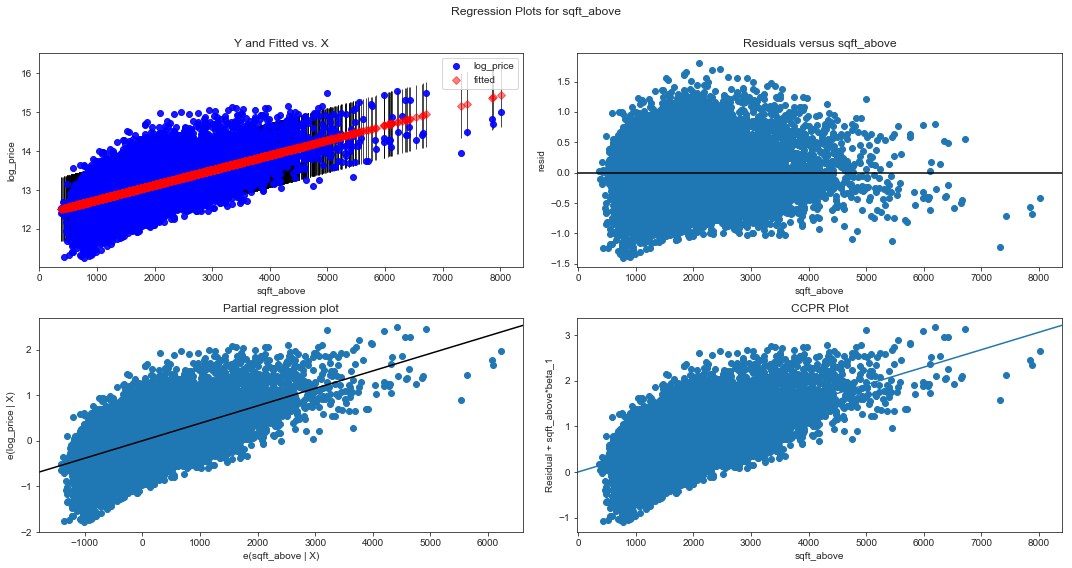

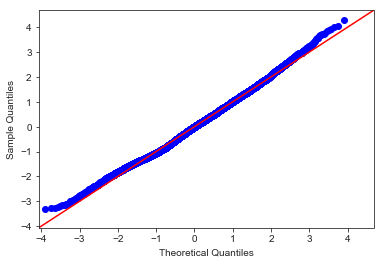

Regression Analysis and Diagnostics for formula: log(price) ~yr_built
-------------------------------------------------------------------------------------


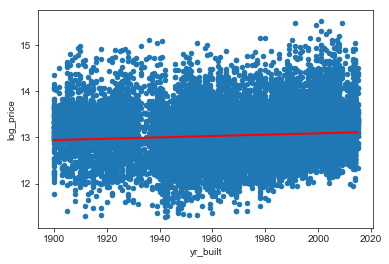

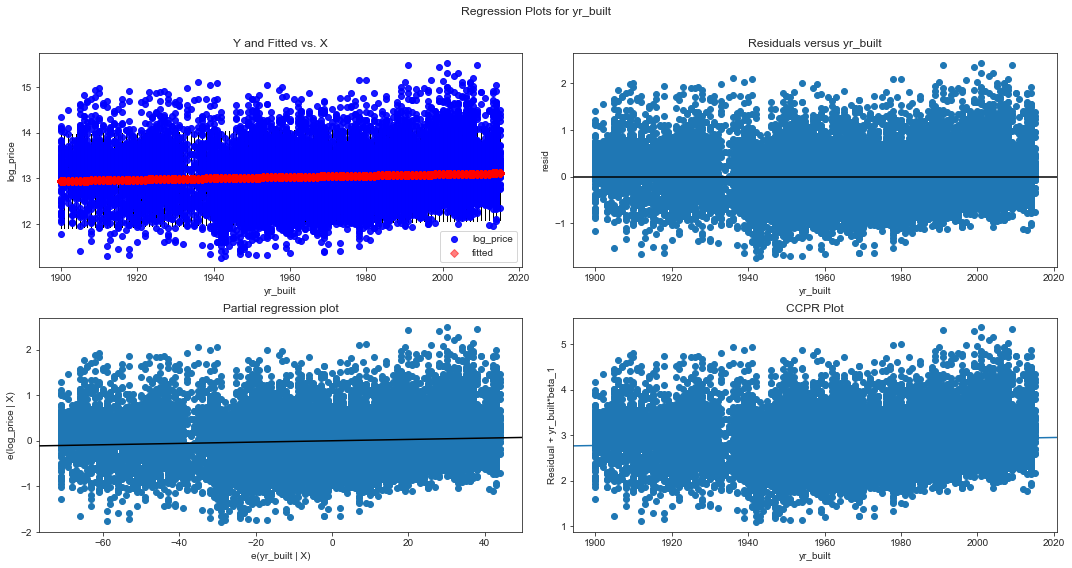

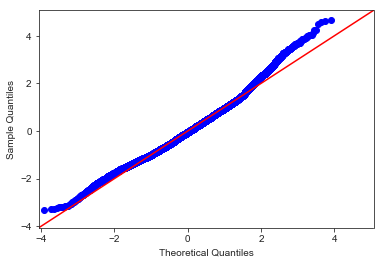

Regression Analysis and Diagnostics for formula: log(price) ~water_1
-------------------------------------------------------------------------------------


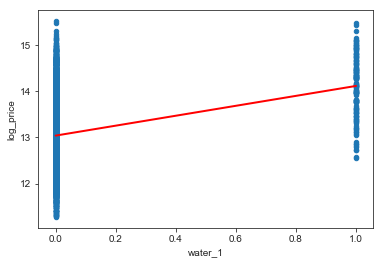

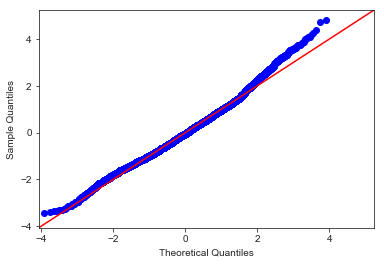

Regression Analysis and Diagnostics for formula: log(price) ~condition
-------------------------------------------------------------------------------------


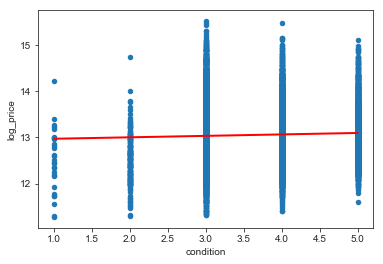

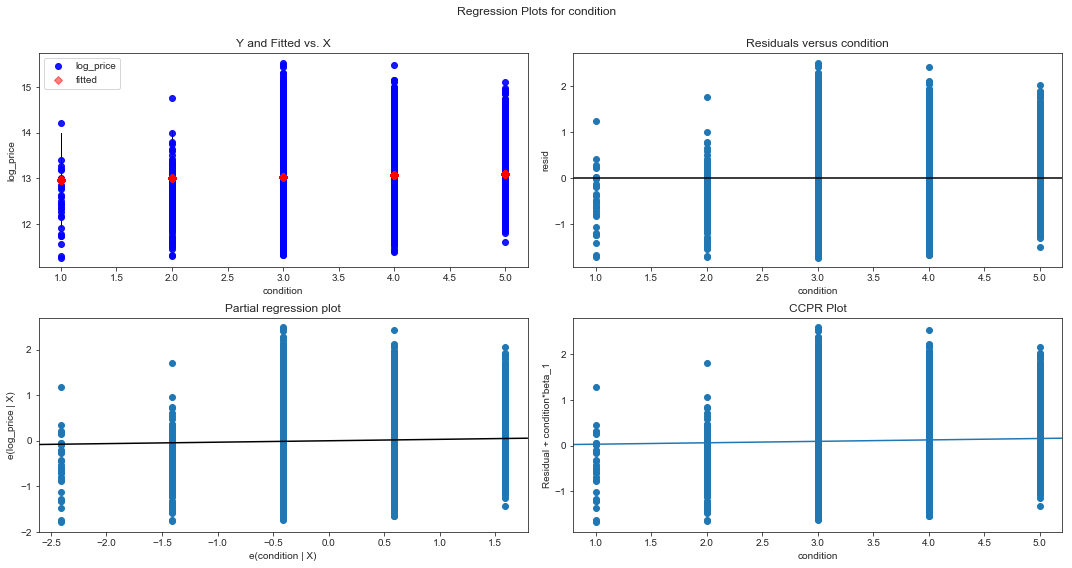

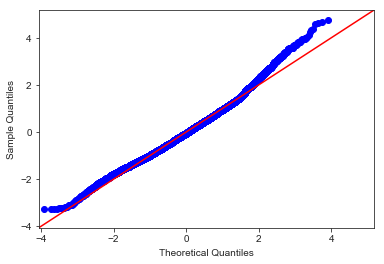

Regression Analysis and Diagnostics for formula: log(price) ~zipcode
-------------------------------------------------------------------------------------


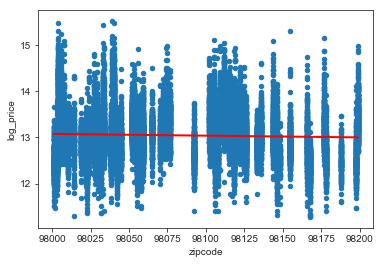

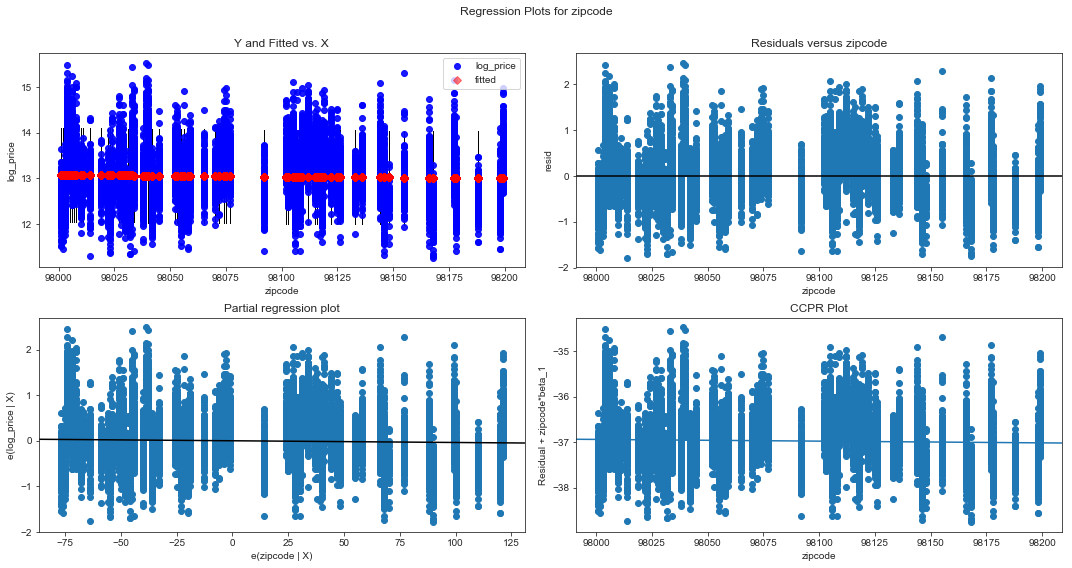

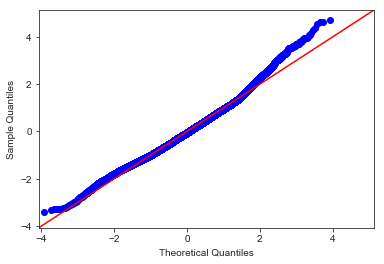

Regression Analysis and Diagnostics for formula: log(price) ~renov_1
-------------------------------------------------------------------------------------


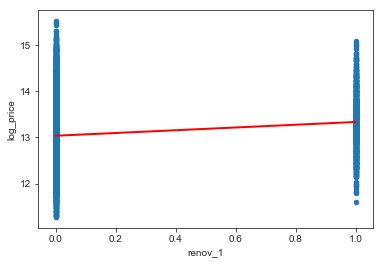

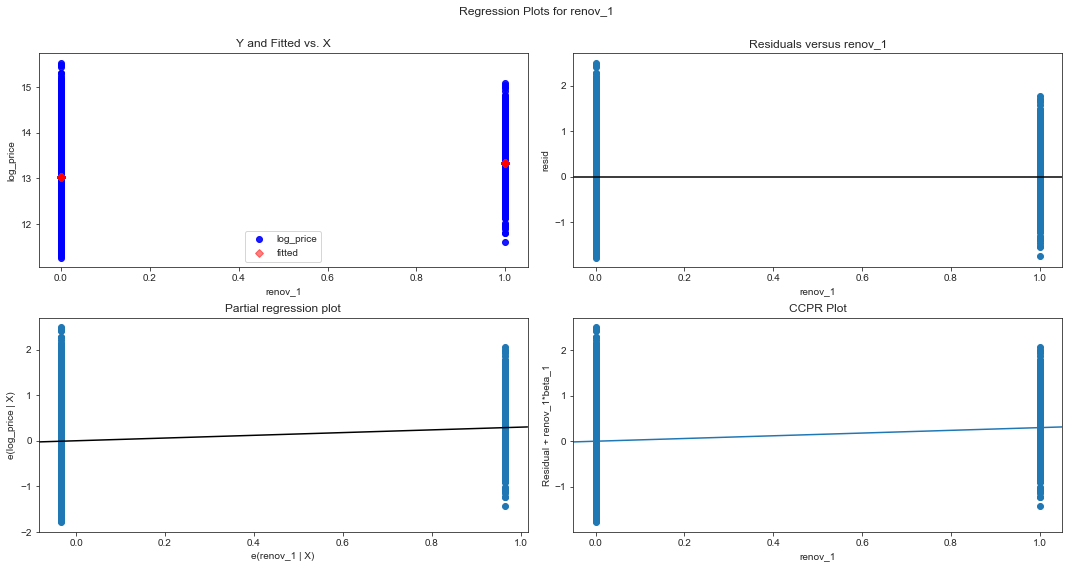

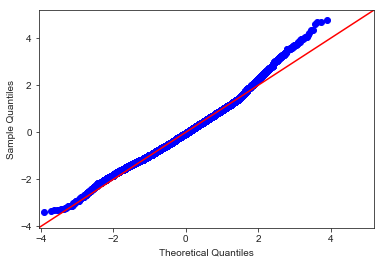

In [83]:
f = ['log_price ~ '+ col for col in X3_new.columns] 

results_logYselected = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ]]
for index, col in enumerate(X3_new.columns):
    print ("Regression Analysis and Diagnostics for formula: log(price) ~" + col)
    print ("-------------------------------------------------------------------------------------")

    
    model_logYselected = smf.ols(formula=f[index], data = data_logYselected).fit()
    
    X_new = pd.DataFrame({col:[data_logYselected[col].min(),data_logYselected[col].max()]})
    preds = model_logYselected.predict(X_new)
    
    data_logYselected.plot.scatter(col, 'log_price')
    plt.plot(X_new, preds, c='r', linewidth = 2)
    plt.show()
    
    fig = plt.figure(figsize = (15,8))
    fig = sm.graphics.plot_regress_exog(model_logYselected, col, fig= fig)
    fig = sm.graphics.qqplot(model_logYselected.resid, dist= stats.norm, line='45', fit= True)
    plt.show()
    results_logYselected.append([col, model_logYselected.rsquared, model_logYselected.params[0],
                    model_logYselected.params[1], model_logYselected.pvalues[1], sms.jarque_bera(model_logYselected.resid)[0] ])
#     input("Press Enter to continue...")

In [84]:
results_logYselected = pd.DataFrame(results_logYselected, columns = results[0])
results_logYselected = results_logYselected.set_index(results_logYselected.ind_var).drop('ind_var', axis =1).drop('ind_var', axis = 0)

In [85]:
results_logYselected

r_squared intercept        slope      p-value normality (JB)
ind_var                                                                     
floors          0.0963881   12.5953     0.302829            0        886.705
bedrooms         0.121904   12.3623     0.203278            0        569.044
sqft_basement   0.0953828   12.9417  0.000371032            0        654.231
bathrooms        0.301781   12.2493     0.377509            0         196.82
sqft_above       0.359062   12.3631  0.000382966            0        129.963
yr_built       0.00665841   10.1712   0.00145929  3.26863e-33        959.999
water_1         0.0279068   13.0403       1.0777  7.5758e-135         609.66
condition      0.00150896   12.9406    0.0313635   1.1396e-08        920.405
zipcode        0.00147548   50.0172 -0.000376942  1.65379e-08        883.226
renov_1         0.0107132   13.0372     0.298543  1.75668e-52        879.679

The $R^2$ value did not change which means that 7 predictors that were eliminated by the selection do not contribute much to explain the data.  

In [86]:
crossVal

{'logY': 0.12496078587606232, 'logYnormalized': 0.2670553990767271}

In [87]:
X5= data_logYselected.drop('log_price', axis = 1)
y5 = data_logYselected.log_price

linreg= LinearRegression()
linreg.fit(X5, y5)

cv_5_results = cross_val_score(linreg, X5, y5, cv =5, scoring ='neg_mean_squared_error')
crossVal['logYselected'] = abs(np.mean(cv_5_results))
print(crossVal)

{'logY': 0.12496078587606232, 'logYnormalized': 0.2670553990767271, 'logYselected': 0.12496099008679025}


In [88]:
strongCorr(data_logYselected,0.5)

the correlation is higher than 0.5 with floors 
 floors        1.000000
bathrooms     0.503698
sqft_above    0.526120
Name: floors, dtype: float64 

the correlation is higher than 0.5 with bedrooms 
 bedrooms     1.000000
bathrooms    0.526004
Name: bedrooms, dtype: float64 

the correlation is higher than 0.5 with bathrooms 
 floors        0.503698
bedrooms      0.526004
bathrooms     1.000000
sqft_above    0.683638
yr_built      0.510456
log_price     0.549346
Name: bathrooms, dtype: float64 

the correlation is higher than 0.5 with sqft_above 
 floors        0.526120
bathrooms     0.683638
sqft_above    1.000000
log_price     0.599218
Name: sqft_above, dtype: float64 

the correlation is higher than 0.5 with yr_built 
 bathrooms    0.510456
yr_built     1.000000
Name: yr_built, dtype: float64 

the correlation is higher than 0.5 with log_price 
 bathrooms     0.549346
sqft_above    0.599218
log_price     1.000000
Name: log_price, dtype: float64 



# Exploring polynomial features that may improve our model. 

In [89]:
from sklearn.preprocessing import PolynomialFeatures

Let us add interaction term ( e.g. $X_1 X_2$ for $X_1, X_2$ are predictors) to our selected model and explore the possibility of improving the model. 

In [90]:
poly1 = PolynomialFeatures(interaction_only= True,include_bias = False)
interactions = poly1.fit_transform(X5)

columns =poly1.get_feature_names(X5.columns)
for ind, col in enumerate(columns):
    if ' ' in col:
        columns[ind] = col.replace(' ', '__')
test1 = pd.DataFrame(interactions, columns = columns)
X_new = test1.copy()
test1['log_price']= y5
# test1.reset_index(inplace =True)
# X_new = test1.drop('log_price',axis =1)

linear_regression = LinearRegression()
outcome ='log_price'
formula = outcome +'~' + '+'.join(X_new.columns)

model_poly1 =  smf.ols(formula=formula, data=test1).fit()
model_poly1.summary()
# X_new = X_new.reset_index()

#selection2 = stepwise_selection(X_new,y)

# pipeline = Pipeline([("polynomial_features", poly2),
#                          ("linear_regression", linear_regression)])  
# pipeline.named_steps
# pipeline.fit(X,y)
# pipeline


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     522.1
Date:                Tue, 16 Jul 2019   Prob (F-statistic):               0.00
Time:                        08:55:05   Log-Likelihood:                -7579.5
No. Observations:               21582   AIC:                         1.527e+04
Df Residuals:                   21526   BIC:                         1.572e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  -707.0851    529.872     -1.334      0.182   -1745.675     331.504
floors                     -199.3390     13.000    -15.334      0.000    -224.820    -173.858
bedrooms                     50.4252      6.763      7.457      0.000      37.170      63.680
sqft_basement                -0.0230      0.014     -1.701      0.089      -0.050       0.004
bathrooms                   -25.7417     11.130     -2.313      0.021     -47.558      -3.925
sqft_above                    0.0822      0.010      8.272      0.000       0.063       0.102
yr_built                      0.4036      0.269      1.503      0.133      -0.123       0.930
water_1                     211.8901     52.093      4.068      0.000     109.785     313.996
condition                   -22.5365      8.135     -2.770      0.006     -38.482      -6.591
zipcode                       0.0074      0.005      1.371      0.170      -0.003       0.018
renov_1                      54.0106     26.267      2.056      0.040       2.526     105.495
floors__bedrooms              0.0176      0.009      2.010      0.044       0.000       0.035
floors__sqft_basement      8.558e-05   1.71e-05      4.996      0.000     5.2e-05       0.000
floors__bathrooms            -0.0534      0.012     -4.525      0.000      -0.077      -0.030
floors__sqft_above        -2.673e-05   1.12e-05     -2.393      0.017   -4.86e-05   -4.84e-06
floors__yr_built              0.0026      0.000      8.294      0.000       0.002       0.003
floors__water_1              -0.1350      0.075     -1.803      0.071      -0.282       0.012
floors__condition             0.0250      0.013      1.924      0.054      -0.000       0.050
floors__zipcode               0.0020      0.000     15.072      0.000       0.002       0.002
floors__renov_1               0.0564      0.038      1.503      0.133      -0.017       0.130
bedrooms__sqft_basement   -1.519e-05   7.73e-06     -1.966      0.049   -3.03e-05   -4.24e-08
bedrooms__bathrooms           0.0153      0.006      2.731      0.006       0.004       0.026
bedrooms__sqft_above      -1.562e-05    5.6e-06     -2.787      0.005   -2.66e-05   -4.64e-06
bedrooms__yr_built           -0.0013      0.000     -9.229      0.000      -0.002      -0.001
bedrooms__water_1             0.1224      0.035      3.490      0.000       0.054       0.191
bedrooms__condition          -0.0114      0.005     -2.112      0.035      -0.022      -0.001
bedrooms__zipcode            -0.0005    6.8e-05     -7.185      0.000      -0.001      -0.000
bedrooms__renov_1            -0.0465      0.017     -2.795      0.005      -0.079      -0.014
sqft_basement__bathrooms  -3.805e-05   1.13e-05     -3.370      0.001   -6.02e-05   -1.59e-05
sqft_basement__sqft_above  -4.64e-08    1.2e-08     -3.869      0.000   -6.

$Adj. R^2$ increased by 0.02 and JB value increased. 

In [91]:
strongCorr(test1, 0.7)

the correlation is higher than 0.7 with floors 
 floors                1.000000
floors__bedrooms      0.821930
floors__bathrooms     0.862173
floors__sqft_above    0.781189
floors__yr_built      0.999248
floors__condition     0.867782
floors__zipcode       0.999999
Name: floors, dtype: float64 

the correlation is higher than 0.7 with bedrooms 
 bedrooms                1.000000
bedrooms__bathrooms     0.809168
bedrooms__sqft_above    0.731547
bedrooms__yr_built      0.998424
bedrooms__condition     0.808798
bedrooms__zipcode       0.999998
Name: bedrooms, dtype: float64 

the correlation is higher than 0.7 with sqft_basement 
 sqft_basement                1.000000
floors__sqft_basement        0.922471
bedrooms__sqft_basement      0.959472
sqft_basement__bathrooms     0.933259
sqft_basement__sqft_above    0.879256
sqft_basement__yr_built      0.999875
sqft_basement__condition     0.972595
sqft_basement__zipcode       1.000000
Name: sqft_basement, dtype: float64 

the correlation is high

As shown in the heat map of the correlation matrix below, many interaction terms are strongly correlated.   

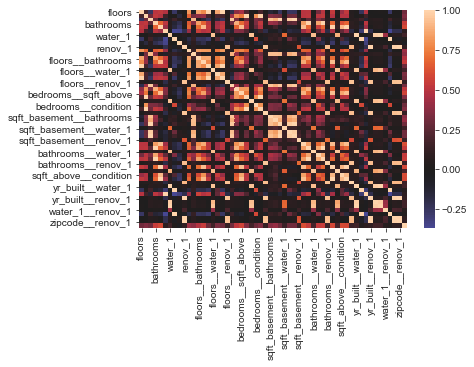

In [92]:
sns.heatmap(test1.corr(), center =0)

In [93]:
test_=test1.copy()
for col in X5:
    part = col + '__'
    names = [x for x in strongCorr1(test_, 0.8) if part in x] 
    test_.drop(names, axis = 1, inplace = True)

In [94]:
print(len(test1.columns),len(test_.columns))

56 14


In [95]:
strongCorr(test_,0.5)

the correlation is higher than 0.5 with floors 
 floors        1.000000
bathrooms     0.503698
sqft_above    0.526120
Name: floors, dtype: float64 

the correlation is higher than 0.5 with bedrooms 
 bedrooms     1.000000
bathrooms    0.526004
Name: bedrooms, dtype: float64 

the correlation is higher than 0.5 with bathrooms 
 floors        0.503698
bedrooms      0.526004
bathrooms     1.000000
sqft_above    0.683638
yr_built      0.510456
log_price     0.549346
Name: bathrooms, dtype: float64 

the correlation is higher than 0.5 with sqft_above 
 floors        0.526120
bathrooms     0.683638
sqft_above    1.000000
log_price     0.599218
Name: sqft_above, dtype: float64 

the correlation is higher than 0.5 with yr_built 
 bathrooms    0.510456
yr_built     1.000000
Name: yr_built, dtype: float64 

the correlation is higher than 0.5 with water_1 
 water_1                   1.000000
sqft_basement__water_1    0.689086
Name: water_1, dtype: float64 

the correlation is higher than 0.5 with

In [96]:
X6 = test_.drop('log_price', axis = 1)
y = test_.log_price
result_interaction = stepwise_selection(X6,y) 

Add  floors                         with p-value 0.0
Add  sqft_basement                  with p-value 0.0
Add  bathrooms                      with p-value 0.0
Add  sqft_above                     with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  bedrooms                       with p-value 2.2094e-96
Add  water_1                        with p-value 1.11359e-70
Add  condition                      with p-value 8.12245e-24
Add  zipcode                        with p-value 1.18333e-12
Add  sqft_basement__renov_1         with p-value 3.22335e-07


In [97]:
X7 = test_[result_interaction]
linreg= LinearRegression()
linreg.fit(X7, y)

cv_5_results = cross_val_score(linreg, X7, y, cv =5, scoring ='neg_mean_squared_error')
crossVal['logYinteraction_sel'] = abs(np.mean(cv_5_results))
print(crossVal)

{'logY': 0.12496078587606232, 'logYnormalized': 0.2670553990767271, 'logYselected': 0.12496099008679025, 'logYinteraction_sel': 0.12489798911236596}


In [98]:
FinalModel = X7.copy()
FinalModel.log_price = y
FinalModel.to_pickle("./finalmodel.pkl")

C:\Users\woogu\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [99]:
formula = 'log_price ~'+ '+'.join(X7.columns)
model_interSel = smf.ols(formula = formula, data = FinalModel).fit()
model_interSel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     2647.
Date:                Tue, 16 Jul 2019   Prob (F-statistic):               0.00
Time:                        08:55:07   Log-Likelihood:                -8084.3
No. Observations:               21582   AIC:                         1.619e+04
Df Residuals:                   21571   BIC:                         1.628e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -15.5639      4.985     -3.122      0.002     -25.334      -5.793
floors                     0.1330      0.006     21.609      0.000       0.121       0.145
sqft_basement              0.0004   7.12e-06     52.924      0.000       0.000       0.000
bathrooms                  0.1188      0.006     21.079      0.000       0.108       0.130
sqft_above                 0.0004   4.61e-06     82.675      0.000       0.000       0.000
yr_built                  -0.0041      0.000    -35.901      0.000      -0.004      -0.004
bedrooms                  -0.0661      0.003    -19.510      0.000      -0.073      -0.059
water_1                    0.5214      0.030     17.520      0.000       0.463       0.580
condition                  0.0467      0.004     11.461      0.000       0.039       0.055
zipcode                    0.0004      5e-05      7.253      0.000       0.000       0.000
sqft_basement__renov_1     0.0001   2.06e-05      5.112      0.000    6.49e-05       0.000
==============================================================================
Omnibus:                       28.943   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.961
Skew:                          -0.072   Prob(JB):                     3.12e-07
Kurtosis:                       3.112   Cond. No.                     2.04e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Regression Analysis and Diagnostics for formula: log(price) ~floors
-------------------------------------------------------------------------------------


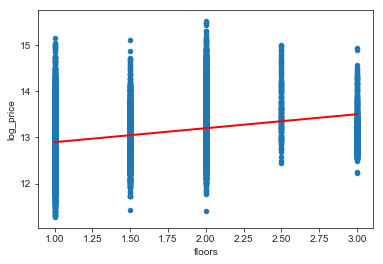

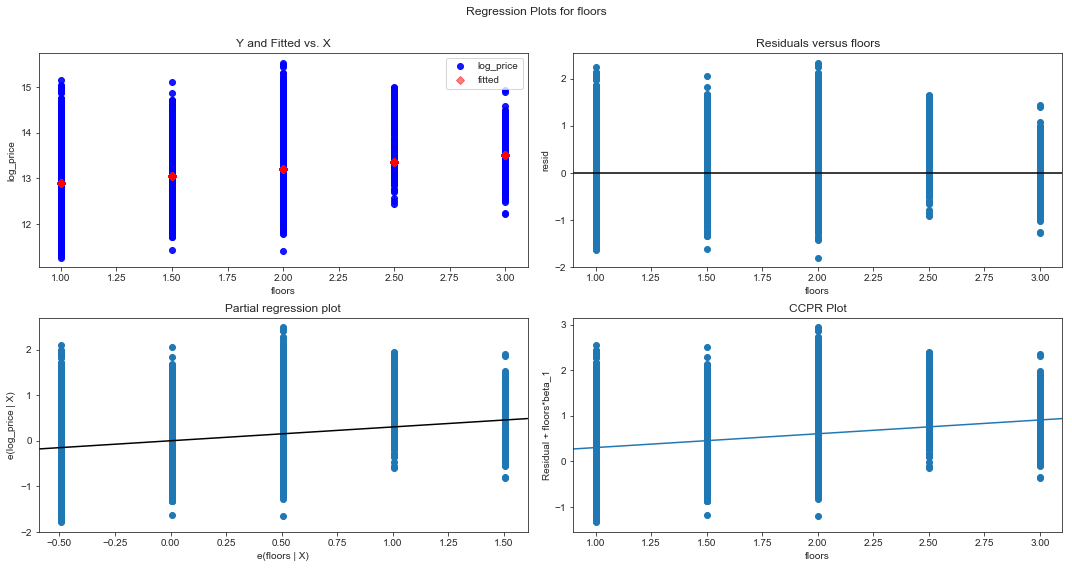

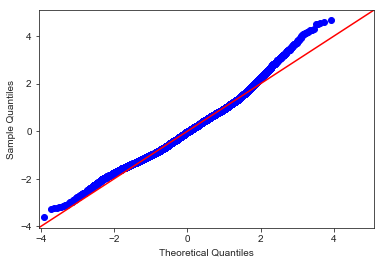

Regression Analysis and Diagnostics for formula: log(price) ~sqft_basement
-------------------------------------------------------------------------------------


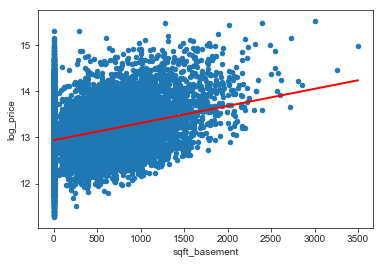

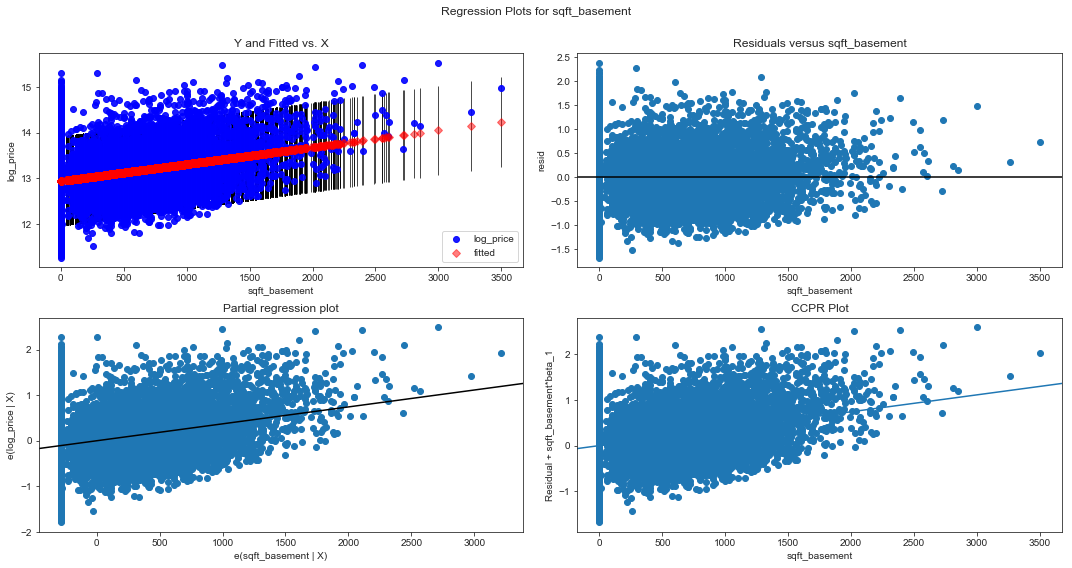

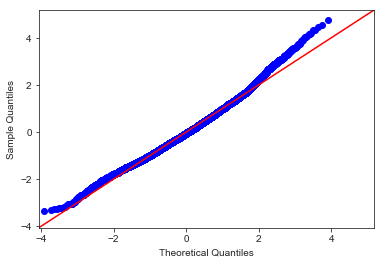

Regression Analysis and Diagnostics for formula: log(price) ~bathrooms
-------------------------------------------------------------------------------------


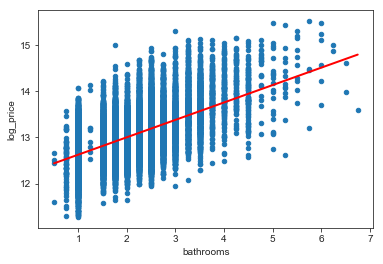

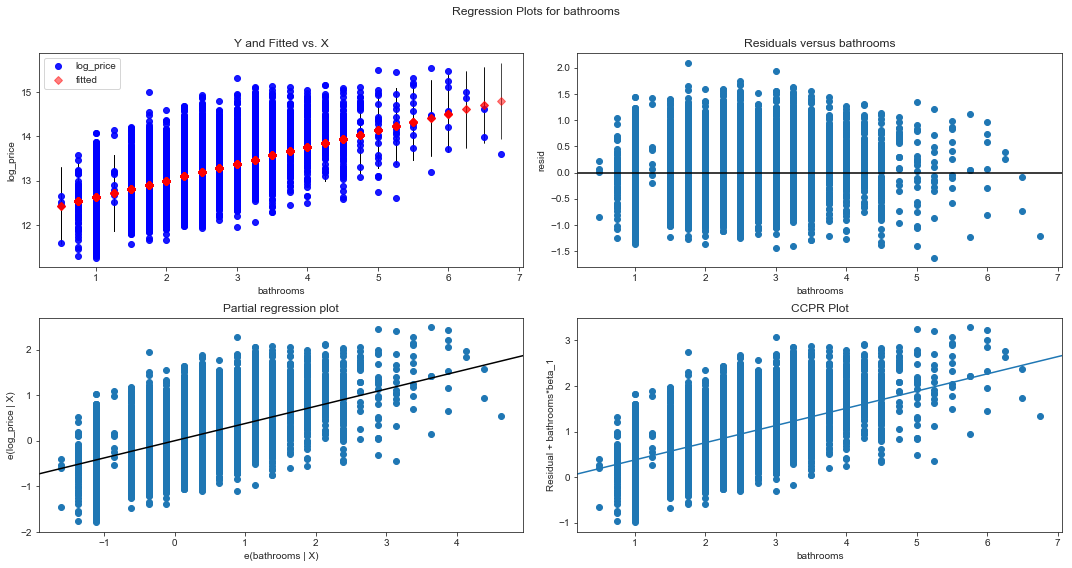

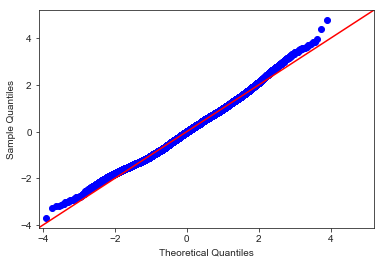

Regression Analysis and Diagnostics for formula: log(price) ~sqft_above
-------------------------------------------------------------------------------------


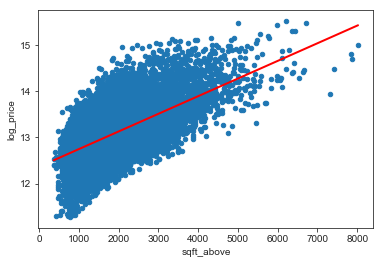

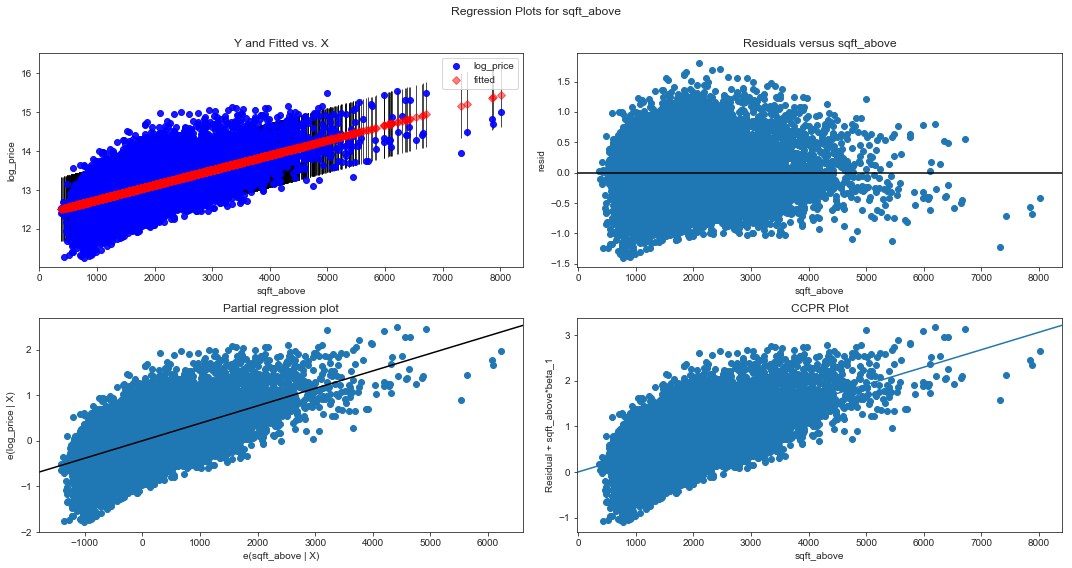

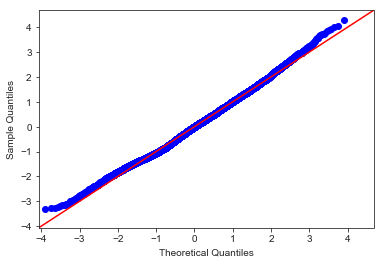

Regression Analysis and Diagnostics for formula: log(price) ~yr_built
-------------------------------------------------------------------------------------


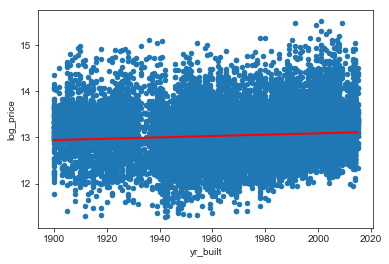

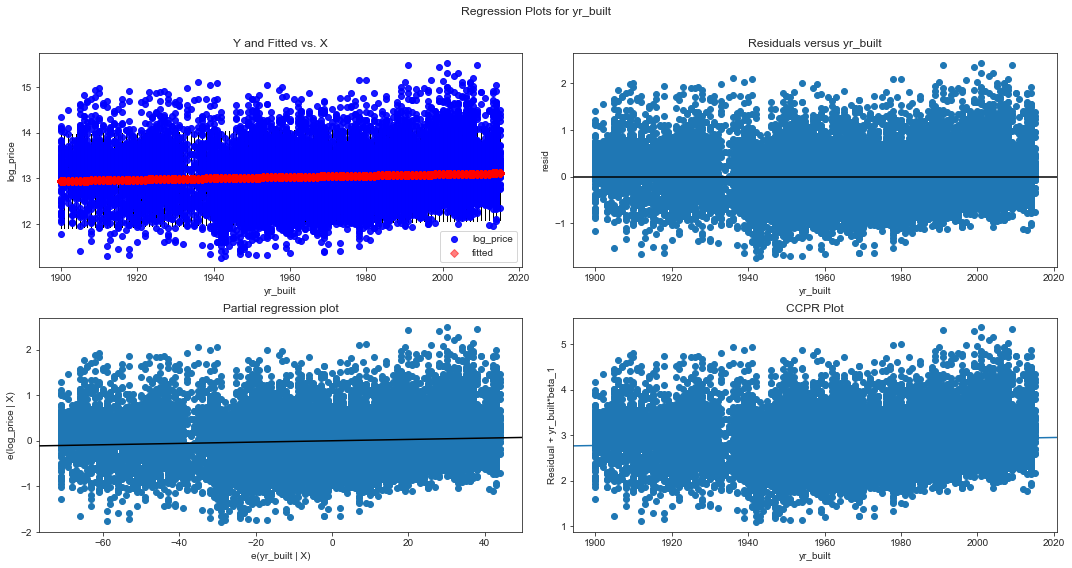

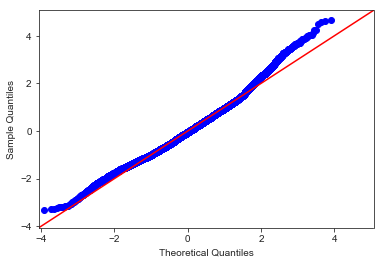

Regression Analysis and Diagnostics for formula: log(price) ~bedrooms
-------------------------------------------------------------------------------------


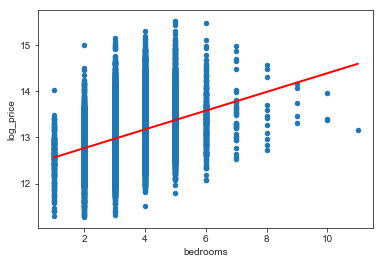

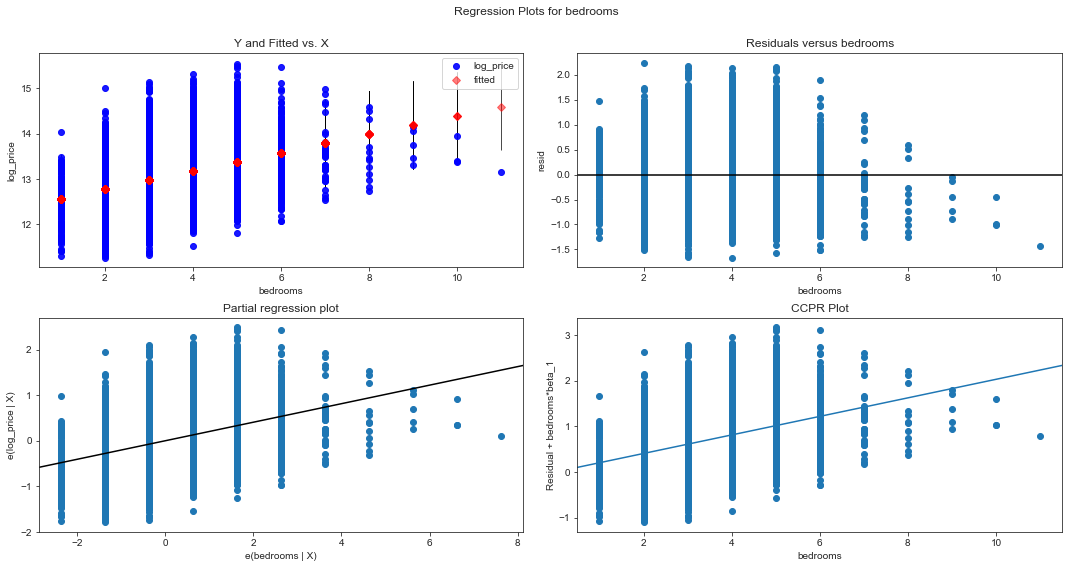

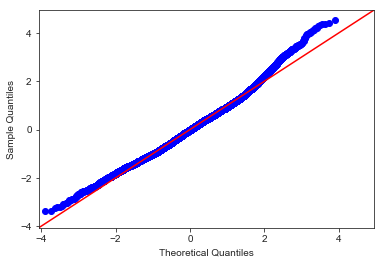

Regression Analysis and Diagnostics for formula: log(price) ~water_1
-------------------------------------------------------------------------------------


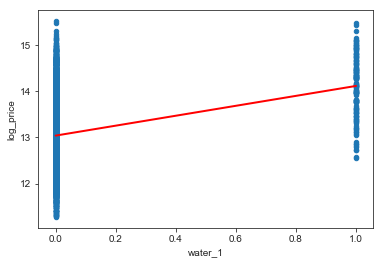

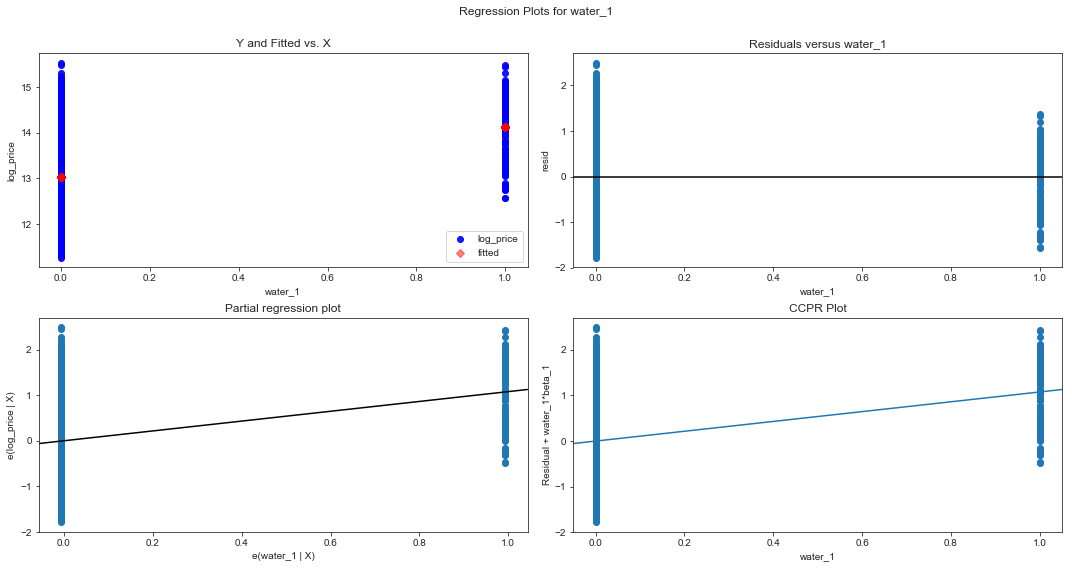

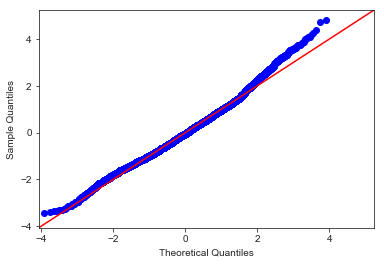

Regression Analysis and Diagnostics for formula: log(price) ~condition
-------------------------------------------------------------------------------------


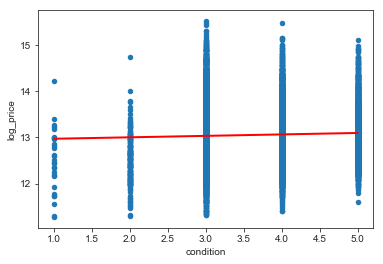

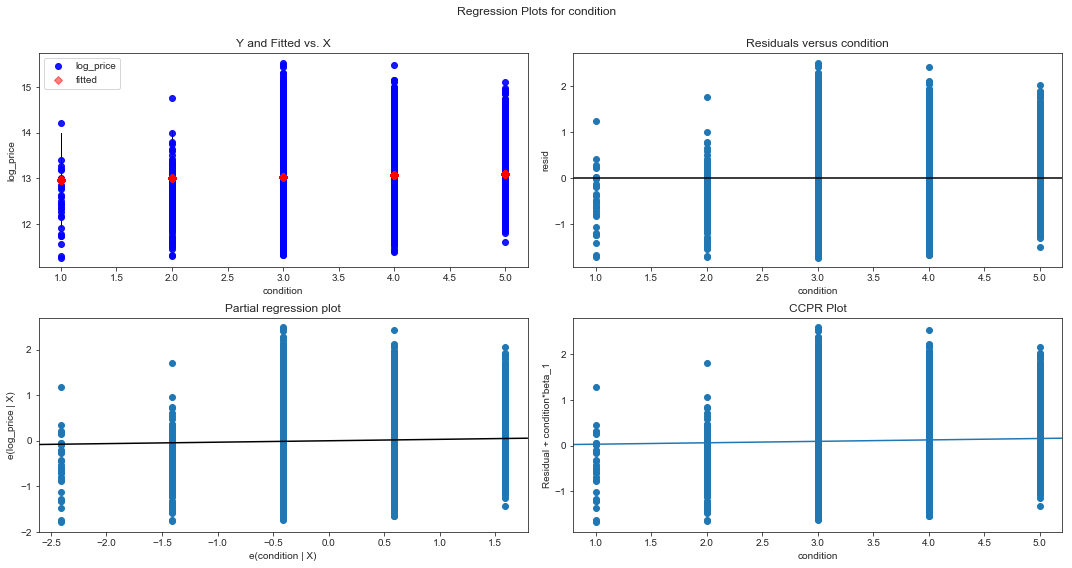

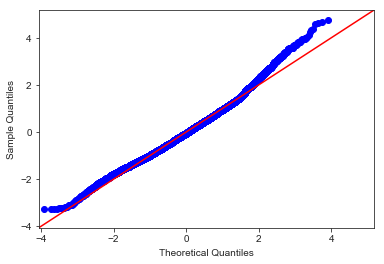

Regression Analysis and Diagnostics for formula: log(price) ~zipcode
-------------------------------------------------------------------------------------


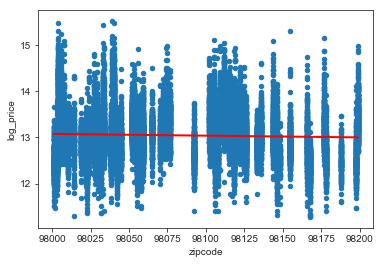

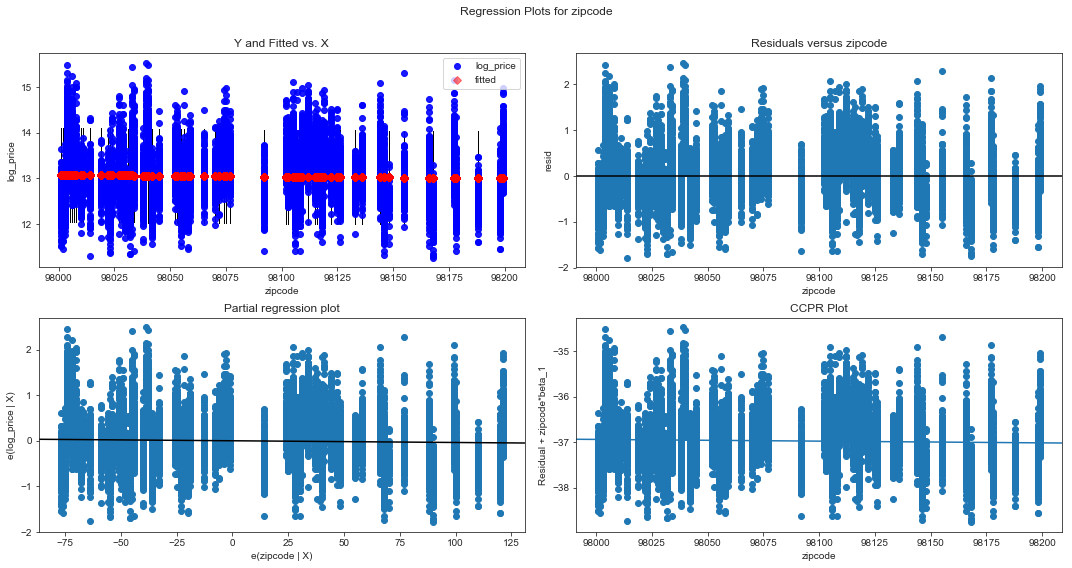

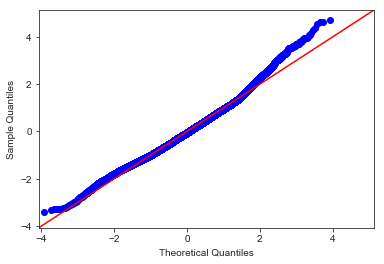

Regression Analysis and Diagnostics for formula: log(price) ~sqft_basement__renov_1
-------------------------------------------------------------------------------------


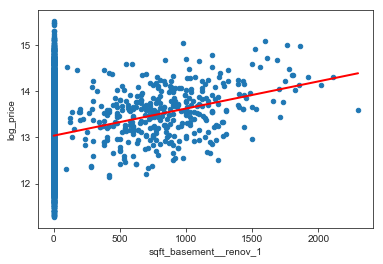

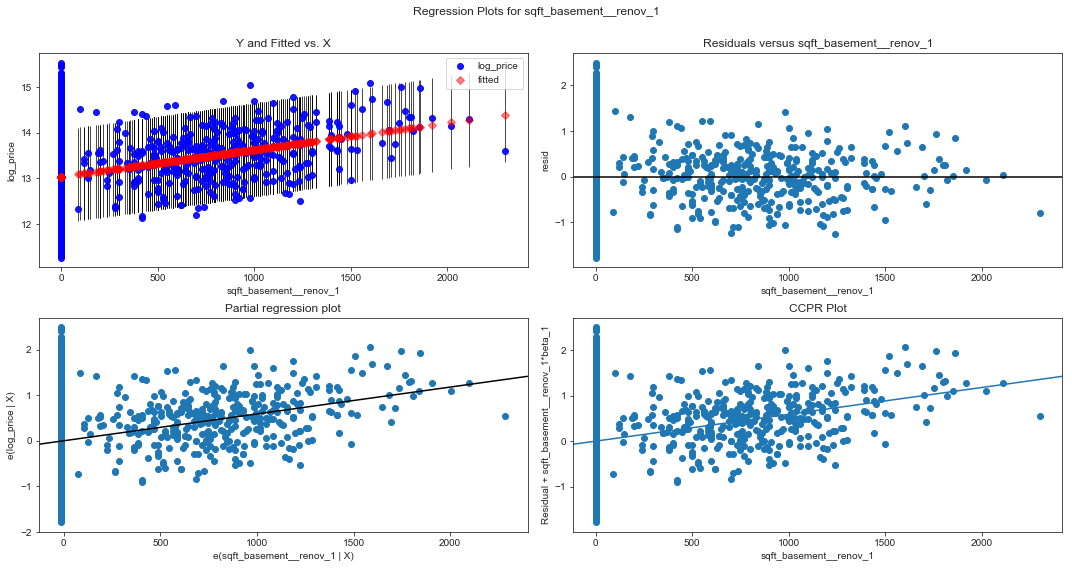

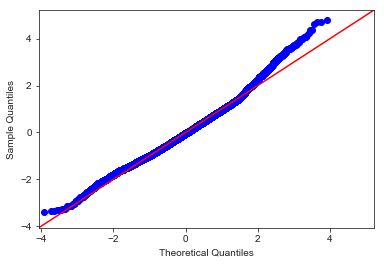

In [100]:
f = ['log_price ~ '+ col for col in X7.columns] 

results_interaction = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ]]
for index, col in enumerate(X7.columns):
    print ("Regression Analysis and Diagnostics for formula: log(price) ~" + col)
    print ("-------------------------------------------------------------------------------------")

    
    model_interact = smf.ols(formula=f[index], data = FinalModel).fit()
    
    X_new = pd.DataFrame({col:[test_[col].min(),test_[col].max()]})
    preds = model_interact.predict(X_new)
    
    test_.plot.scatter(col, 'log_price')
    plt.plot(X_new, preds, c='r', linewidth = 2)
    plt.show()
    
    fig = plt.figure(figsize = (15,8))
    fig = sm.graphics.plot_regress_exog(model_interact, col, fig= fig)
    fig = sm.graphics.qqplot(model_interact.resid, dist= stats.norm, line='45', fit= True)
    plt.show()
    results_interaction.append([col, model_interact.rsquared, model_interact.params[0],
                    model_interact.params[1], model_interact.pvalues[1], 
                                sms.jarque_bera(model_interact.resid)[0] ])
#     input("Press Enter to continue...")

In [101]:
results_interaction = pd.DataFrame(results_interaction, columns = results[0])
results_interaction = results_interaction.set_index(results_interaction.ind_var).drop('ind_var', axis =1).drop('ind_var', axis = 0)

In [102]:
results_interaction

r_squared intercept        slope      p-value  \
ind_var                                                                  
floors                   0.0963881   12.5953     0.302829            0   
sqft_basement            0.0953828   12.9417  0.000371032            0   
bathrooms                 0.301781   12.2493     0.377509            0   
sqft_above                0.359062   12.3631  0.000382966            0   
yr_built                0.00665841   10.1712   0.00145929  3.26863e-33   
bedrooms                  0.121904   12.3623     0.203278            0   
water_1                  0.0279068   13.0403       1.0777  7.5758e-135   
condition               0.00150896   12.9406    0.0313635   1.1396e-08   
zipcode                 0.00147548   50.0172 -0.000376942  1.65379e-08   
sqft_basement__renov_1   0.0185359   13.0389  0.000588618  8.40878e-90   

                       normality (JB)  
ind_var                                
floors                        886.705  
sqft_basement                 654.231  
bathrooms                      196.82  
sqft_above                    129.963  
yr_built                      959.999  
bedrooms                      569.044  
water_1                        609.66  
condition                     920.405  
zipcode                       883.226  
sqft_basement__renov_1         912.63

## The final model we have:
$log(price) = \beta_0 + \beta_1(water\_1) 
                + \beta_2 (floors) + \beta_3 (bathrooms) 
                + \beta_4 (condition) + \beta_5 (sqft\_above) 
                +\beta_6 (sqft\_basement) +\beta_7 (zipcode) 
                + \beta_8 (sqft\_basement \times renov\_1) 
                + \beta_9 (yr\_built) + \beta_{10} (bedrooms)  $.

The rounded coefficients are in the table below:
                
|  $\beta_0$ | $\beta_1$  | $\beta_2$   |$\beta_3$   |  $\beta_4$ |  $\beta_5$ | $\beta_6$   |$\beta_7$   |$\beta_8$   |  $\beta_9$ |$\beta_{10}$   |
|---|---|---|---|---|---|---|---|---|---|---|
|  -16.72|0.54 | 0.13  |  0.12 |  0.049 |  0.00038 |  0.00038|0.00037| 0.00012 |  -0.0041 | -0.069  |

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X7, y, test_size = 0.2)

In [104]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

17265 4317 17265 4317


In [105]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
coeff = linreg.coef_
inter = linreg.intercept_
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [106]:
print(coeff, linreg)

[ 1.29257179e-01  3.73556292e-04  1.15911328e-01  3.84174681e-04
 -4.11445729e-03 -6.66608467e-02  5.28197548e-01  4.29479690e-02
  3.75347586e-04  9.41254382e-05] LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [107]:
import operator
#print(len(coeff), len(X_train.columns))
coeffs = dict(zip(X_train.columns, coeff))
coeffs['intercept'] =inter

sorted_coeffs = sorted(coeffs.items(), reverse = True, key=lambda kv: kv[1])
#sorted(coeffs.items(), key= operator.itemgetter(1))
#pd.DataFrame(coeffs, index =[1])
print(sorted_coeffs)

[('water_1', 0.5281975482892277), ('floors', 0.12925717915296284), ('bathrooms', 0.11591132832333453), ('condition', 0.042947969037504787), ('sqft_above', 0.00038417468093439447), ('zipcode', 0.00037534758605135723), ('sqft_basement', 0.0003735562923131745), ('sqft_basement__renov_1', 9.412543824476845e-05), ('yr_built', -0.004114457287239018), ('bedrooms', -0.06666084672642791), ('intercept', -16.813688115527846)]


## Predictions

In [108]:
#row is a row of the dataframe has predictor variables data with col names as predictor variables.   
def predPrice(row):
    check =pd.DataFrame(dict(row), index =[1])
    y_hat = linreg.predict(check)
    price = np.exp(y_hat)
    return(price)

It is really surprising to see that the view with water is the most influential to the housing price. But below boxplots show that houses that have the water view are significantly in higher price range. 

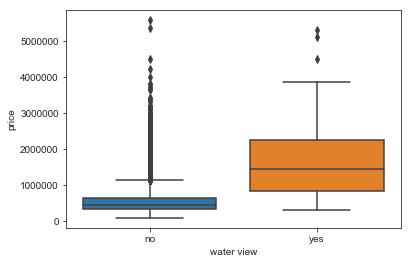

In [109]:
data = X7.copy()#after stepwise selection, final model
data['price'] = np.exp(y)
fig, ax = plt.subplots()
box = sns.boxplot(x = "water_1", y="price", data = data, ax = ax)
ax.set_xticklabels(['no', 'yes'])
ax.set_xlabel('water view')
fig.savefig('water_price.png', dpi=400, bbox_inches="tight")

In [110]:
waterview = data[data.water_1 == 1]
len(waterview.zipcode.unique())

28

In [111]:
compare_w = X7.median()
y_hat0 = predPrice(compare_w)

In [112]:
compare_w

floors                        1.50
sqft_basement                 0.00
bathrooms                     2.25
sqft_above                 1560.00
yr_built                   1975.00
bedrooms                      3.00
water_1                       0.00
condition                     3.00
zipcode                   98065.00
sqft_basement__renov_1        0.00
dtype: float64

In [113]:
compare_w1 =compare_w
compare_w1['water_1'] = 1.00
y_hat1 = predPrice(compare_w1)

In [114]:
print('the home price without the waterfront view: ${}, \n the home price with the waterfront view: ${}, \n the increase in home price by ${} \n which is {}% incease'.format(y_hat0, y_hat1, y_hat1-y_hat0,(y_hat1-y_hat0)/y_hat0))

the home price without the waterfront view: $[381390.81706678], 
 the home price with the waterfront view: $[646790.32171516], 
 the increase in home price by $[265399.50464838] 
 which is [0.69587282]% incease


### Estimating the price difference by the Floor feature

In [115]:
compare_f = X7.median()
compare_f['floors'] =1
compare_f1 = compare_f.copy()
compare_f1['floors'] = 2

In [116]:
yf_hat = predPrice(compare_f)
yf1_hat = predPrice(compare_f1)
print('The price for the 1-story home is ${} \n and the price for the 2-story home is ${}.'.format(yf_hat, yf1_hat), '\n','The price is increased by ${}, {}%'.format(yf1_hat-yf_hat,(yf1_hat-yf_hat)/yf_hat*100)) 

The price for the 1-story home is $[357521.68812957] 
 and the price for the 2-story home is $[406853.51454861]. 
 The price is increased by $[49331.82641904], [13.7982752]%


### Estimating the price difference by the number of bathrooms

In [117]:
compare_bath = X7.median()
compare_bath['bathrooms'] = 2
compare_bath1 = compare_bath.copy()
compare_bath1['bathrooms'] = 3
# X7.bathrooms.value_counts()
yb_hat = predPrice(compare_bath)
yb1_hat = predPrice(compare_bath1)
print("The home price with 2 bathrooms:${} \n the home price with 3 bathrooms:${}".format(yb_hat, yb1_hat), '\n increased by ${}, {}%'.format(yb1_hat-yb_hat,(yb1_hat-yb_hat)/yb_hat*100)) 

The home price with 2 bathrooms:$[370497.53216335] 
 the home price with 3 bathrooms:$[416030.30751449] 
 increased by $[45532.77535114], [12.28962986]%


### Let us check out the size of the basement and the interacted effect of it with the renovation. 

It was interesting to find that the renovation feature was only influential when it was combined with the size of the basement. 

Slice the dataset so that we have only data about the houses with basements. 

In [118]:
basement = data[data.sqft_basement>0]
nobasement = data[data.sqft_basement == 0]
print(len(basement), len(nobasement))

8310 13272


Then create a categorical variable that is 1 if the house was renovated and 0 if not among houses with the basement. 

In [119]:
f = lambda x: 1 if x>0 else 0 
basement['renovated']= basement.sqft_basement__renov_1.map(f)

C:\Users\woogu\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [120]:
basement.renovated.unique()

array([1, 0], dtype=int64)

The box plot below shows that the renovated houses with the basement has the higher price range;

the sizes of basements of renovated houses have slightly higher range than ones without houses without a renovation from the second box plot. 

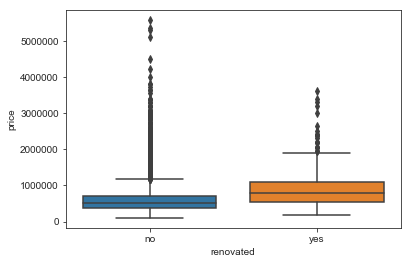

In [121]:

# basement.renovated.describe()
fig, ax = plt.subplots()
box = sns.boxplot(x = "renovated", y="price", data = basement, ax = ax)
ax.set_xticklabels(['no', 'yes'])
ax.set_xlabel('renovated')
fig.savefig('renovated.png', dpi=400, bbox_inches="tight")

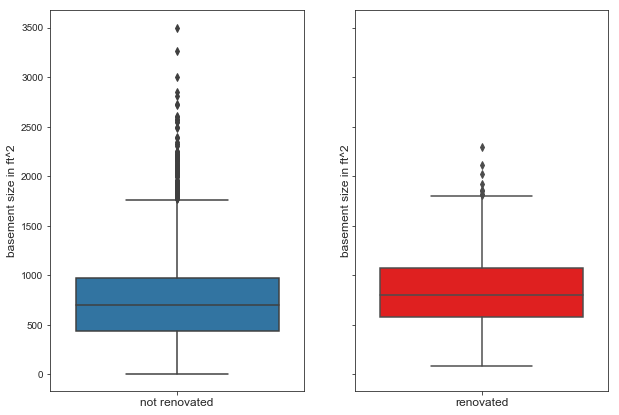

In [122]:
# base_size = pd.DataFrame()
base_renov0 = basement[basement.renovated==0.].sqft_basement
base_renov1 = basement[basement.renovated==1.].sqft_basement
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize = (10,7))
# fig.suptitle('basement sizes with/without renovations', fontsize =16)
box0 = sns.boxplot( y = base_renov0, ax = ax1)
ax1.set_xticklabels(['not renovated'],fontsize =12)
# box1 = sns.boxplot( data = base_renov1, ax = ax2, color = 'r')
box1 = sns.boxplot( y = base_renov1, ax = ax2, color ='r')
ax2.set_xticklabels(['renovated'],fontsize =12)

ax1.set_ylabel("basement size in ft^2",fontsize =12)
ax2.set_ylabel("basement size in ft^2",fontsize =12)
# ax.set_xticklabels(['no', 'yes'])
# ax.set_xlabel('renovated')
fig.savefig('basementSize_renovated.png', dpi=400, bbox_inches="tight")

In [123]:
print(base_renov0.describe(),'\n', base_renov1.describe())

count    7941.00000
mean      735.25362
std       398.78311
min        10.00000
25%       440.00000
50%       700.00000
75%       970.00000
max      3500.00000
Name: sqft_basement, dtype: float64 
 count     369.000000
mean      850.818428
std       389.864653
min        90.000000
25%       580.000000
50%       800.000000
75%      1070.000000
max      2300.000000
Name: sqft_basement, dtype: float64


The actual amount in home prices did not change much.  

In [124]:
compare_r0 = X7.median()
compare_r1 = compare_r0.copy()
compare_r1['sqft_basement__renov_1']= 1.00
y_hat0=predPrice(compare_r0)
y_hat1=predPrice(compare_r1)
diff = y_hat1-y_hat0
print('no:${}, yes:${}, increase:${}'.format(y_hat0, y_hat1, diff))

no:$[381390.81706678], yes:$[381426.71733412], increase:$[35.90026734]


In [125]:
(y_hat1-y_hat0)/y_hat0

array([9.41298682e-05])

It turns out that there is only $40 difference after the renovation according to our model. 

### The final inspection of the model
It was unexpected that the number of bedrooms would have a negative coefficient so we check if the model would produce good predictions with throughout the range of this variable.

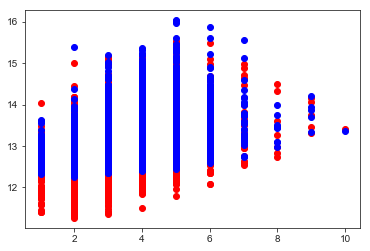

In [126]:
plt.plot( X_train.bedrooms,y_train, 'or')
plt.plot(X_train.bedrooms,y_hat_train,'ob')

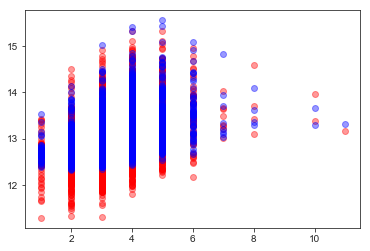

In [127]:
plt.plot( X_test.bedrooms, y_test, 'or', alpha =0.4 )
plt.plot(X_test.bedrooms, y_hat_test, 'ob', alpha =0.4)

Looks good. 